## 새롭게 만든 Credit 가져오기

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
credit = pd.read_csv('../data/new_credit.csv')
credit

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CREDIT_SCORE,CREDIT_TOTAL,OPEN_MONTH,END_MONTH,WINDOW,SCALED_SCORE,CREDIT_USE_MONTH,NOT_USED_MONTH,C_RATIO,C_COUNT,OVER60_OVERTWICE,0_COUNT,0_RATIO
0,0,5001711,0,X,3,18,-3,0,4,4.500000,3.0,1.0,0.000000,0.0,0.0,3.0,1.000000
1,1,5001711,-1,0,5,18,-3,0,4,4.500000,3.0,1.0,0.000000,0.0,0.0,3.0,1.000000
2,2,5001711,-2,0,5,18,-3,0,4,4.500000,3.0,1.0,0.000000,0.0,0.0,3.0,1.000000
3,3,5001711,-3,0,5,18,-3,0,4,4.500000,3.0,1.0,0.000000,0.0,0.0,3.0,1.000000
4,4,5001712,0,C,6,104,-18,0,19,5.473684,19.0,0.0,0.473684,9.0,0.0,10.0,0.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,5150487,-25,C,6,180,-29,0,30,6.000000,30.0,0.0,1.000000,30.0,0.0,0.0,0.000000
1048571,1048571,5150487,-26,C,6,180,-29,0,30,6.000000,30.0,0.0,1.000000,30.0,0.0,0.0,0.000000
1048572,1048572,5150487,-27,C,6,180,-29,0,30,6.000000,30.0,0.0,1.000000,30.0,0.0,0.0,0.000000
1048573,1048573,5150487,-28,C,6,180,-29,0,30,6.000000,30.0,0.0,1.000000,30.0,0.0,0.0,0.000000


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1048575 non-null  int64  
 1   ID                1048575 non-null  int64  
 2   MONTHS_BALANCE    1048575 non-null  int64  
 3   STATUS            1048575 non-null  object 
 4   CREDIT_SCORE      1048575 non-null  int64  
 5   CREDIT_TOTAL      1048575 non-null  int64  
 6   OPEN_MONTH        1048575 non-null  int64  
 7   END_MONTH         1048575 non-null  int64  
 8   WINDOW            1048575 non-null  int64  
 9   SCALED_SCORE      1048575 non-null  float64
 10  CREDIT_USE_MONTH  1048575 non-null  float64
 11  NOT_USED_MONTH    1048575 non-null  float64
 12  C_RATIO           947052 non-null   float64
 13  C_COUNT           1048575 non-null  float64
 14  OVER60_OVERTWICE  1048575 non-null  float64
 15  0_COUNT           1048575 non-null  float64
 16  

## WINDOW와 SCALED_SCORE만 따로 추출

In [64]:
credit2 = credit[['ID', 'WINDOW', 'SCALED_SCORE']]
credit2

,ID,WINDOW,SCALED_SCORE
0,5001711,4,4.500000
1,5001711,4,4.500000
2,5001711,4,4.500000
3,5001711,4,4.500000
4,5001712,19,5.473684
...,...,...,...
1048570,5150487,30,6.000000
1048571,5150487,30,6.000000
1048572,5150487,30,6.000000
1048573,5150487,30,6.000000


### 중복된 값 제거

In [10]:
application = pd.read_csv('../data/application_record.csv')
application.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Car', 'FLAG_OWN_REALTY': 'Reality',
                                'CNT_CHILDREN': 'ChildNo', 'AMT_INCOME_TOTAL': 'Income',
                                'NAME_EDUCATION_TYPE': 'Edutype', 'NAME_FAMILY_STATUS': 'FamilyType',
                                'NAME_HOUSING_TYPE': 'HouseType', 'FLAG_EMAIL': 'Email',
                                'NAME_INCOME_TYPE': 'IncomeType', 'FLAG_WORK_PHONE': 'Wkphone',
                                'FLAG_PHONE': 'Phone', 'CNT_FAM_MEMBERS': 'FamilySize',
                                'OCCUPATION_TYPE': 'Occupy'}, inplace=True)
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             438557 non-null  int64  
 1   Gender         438557 non-null  object 
 2   Car            438557 non-null  object 
 3   Reality        438557 non-null  object 
 4   ChildNo        438557 non-null  int64  
 5   Income         438557 non-null  float64
 6   IncomeType     438557 non-null  object 
 7   Edutype        438557 non-null  object 
 8   FamilyType     438557 non-null  object 
 9   HouseType      438557 non-null  object 
 10  DAYS_BIRTH     438557 non-null  int64  
 11  DAYS_EMPLOYED  438557 non-null  int64  
 12  FLAG_MOBIL     438557 non-null  int64  
 13  Wkphone        438557 non-null  int64  
 14  Phone          438557 non-null  int64  
 15  Email          438557 non-null  int64  
 16  Occupy         304354 non-null  object 
 17  FamilySize     438557 non-nul

In [11]:
application_unique = application.drop_duplicates(subset=['Gender', 'Car', 'Reality', 'ChildNo', 'Income', 'IncomeType', 'Edutype', 'FamilyType', 'HouseType', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'Wkphone', 'Phone', 'Email', 'Occupy', 'FamilySize'], keep='first')
application_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90085 entries, 0 to 438553
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             90085 non-null  int64  
 1   Gender         90085 non-null  object 
 2   Car            90085 non-null  object 
 3   Reality        90085 non-null  object 
 4   ChildNo        90085 non-null  int64  
 5   Income         90085 non-null  float64
 6   IncomeType     90085 non-null  object 
 7   Edutype        90085 non-null  object 
 8   FamilyType     90085 non-null  object 
 9   HouseType      90085 non-null  object 
 10  DAYS_BIRTH     90085 non-null  int64  
 11  DAYS_EMPLOYED  90085 non-null  int64  
 12  FLAG_MOBIL     90085 non-null  int64  
 13  Wkphone        90085 non-null  int64  
 14  Phone          90085 non-null  int64  
 15  Email          90085 non-null  int64  
 16  Occupy         62608 non-null  object 
 17  FamilySize     90085 non-null  float64
dtypes: float64

### Null값 채워주기

In [12]:
application_unique['Occupy'].fillna('not_specified',inplace=True)
application_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90085 entries, 0 to 438553
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             90085 non-null  int64  
 1   Gender         90085 non-null  object 
 2   Car            90085 non-null  object 
 3   Reality        90085 non-null  object 
 4   ChildNo        90085 non-null  int64  
 5   Income         90085 non-null  float64
 6   IncomeType     90085 non-null  object 
 7   Edutype        90085 non-null  object 
 8   FamilyType     90085 non-null  object 
 9   HouseType      90085 non-null  object 
 10  DAYS_BIRTH     90085 non-null  int64  
 11  DAYS_EMPLOYED  90085 non-null  int64  
 12  FLAG_MOBIL     90085 non-null  int64  
 13  Wkphone        90085 non-null  int64  
 14  Phone          90085 non-null  int64  
 15  Email          90085 non-null  int64  
 16  Occupy         90085 non-null  object 
 17  FamilySize     90085 non-null  float64
dtypes: float64

### 데이터 병합하기

In [65]:
merge_df = pd.merge(application_unique, credit2, on='ID')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219173 entries, 0 to 219172
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             219173 non-null  int64  
 1   Gender         219173 non-null  object 
 2   Car            219173 non-null  object 
 3   Reality        219173 non-null  object 
 4   ChildNo        219173 non-null  int64  
 5   Income         219173 non-null  float64
 6   IncomeType     219173 non-null  object 
 7   Edutype        219173 non-null  object 
 8   FamilyType     219173 non-null  object 
 9   HouseType      219173 non-null  object 
 10  DAYS_BIRTH     219173 non-null  int64  
 11  DAYS_EMPLOYED  219173 non-null  int64  
 12  FLAG_MOBIL     219173 non-null  int64  
 13  Wkphone        219173 non-null  int64  
 14  Phone          219173 non-null  int64  
 15  Email          219173 non-null  int64  
 16  Occupy         219173 non-null  object 
 17  FamilySize     219173 non-nul

### 데이터 중복 제거하기

In [66]:
merge_df = merge_df.drop_duplicates(subset=['Gender', 'Car', 'Reality', 'ChildNo', 'Income', 'IncomeType', 'Edutype', 'FamilyType', 'HouseType', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'Wkphone', 'Phone', 'Email', 'Occupy', 'FamilySize', 'WINDOW', 'SCALED_SCORE'], keep='first')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9709 entries, 0 to 219159
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             9709 non-null   int64  
 1   Gender         9709 non-null   object 
 2   Car            9709 non-null   object 
 3   Reality        9709 non-null   object 
 4   ChildNo        9709 non-null   int64  
 5   Income         9709 non-null   float64
 6   IncomeType     9709 non-null   object 
 7   Edutype        9709 non-null   object 
 8   FamilyType     9709 non-null   object 
 9   HouseType      9709 non-null   object 
 10  DAYS_BIRTH     9709 non-null   int64  
 11  DAYS_EMPLOYED  9709 non-null   int64  
 12  FLAG_MOBIL     9709 non-null   int64  
 13  Wkphone        9709 non-null   int64  
 14  Phone          9709 non-null   int64  
 15  Email          9709 non-null   int64  
 16  Occupy         9709 non-null   object 
 17  FamilySize     9709 non-null   float64
 18  WINDOW     

## 군집화 진행

#### 군집 2개

In [78]:
feature = merge_df[['WINDOW', 'SCALED_SCORE']]
feature

,WINDOW,SCALED_SCORE
0,16,5.625000
16,30,4.166667
46,5,3.800000
51,17,4.647059
68,6,5.000000
...,...,...
219063,21,4.809524
219084,20,5.000000
219104,22,4.454545
219126,33,3.818182


In [68]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(feature)

KMeans(n_clusters=2)

In [69]:
model.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [70]:
model.cluster_centers_

array([[40.50775988,  5.1063677 ],
       [12.84381951,  4.75737893]])

In [71]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature

,WINDOW,SCALED_SCORE,cluster
0,16.0,5.625000,1.0
16,30.0,4.166667,0.0
46,5.0,3.800000,0.0
51,17.0,4.647059,0.0
68,6.0,5.000000,1.0
...,...,...,...
9704,NaN,NaN,1.0
9705,NaN,NaN,1.0
9706,NaN,NaN,1.0
9707,NaN,NaN,0.0


In [72]:
feature.to_csv('feature.csv', index=False)

In [73]:
feature = pd.read_csv('feature.csv')
feature

,WINDOW,SCALED_SCORE,cluster
0,16,5.625000,1
1,30,4.166667,0
2,5,3.800000,0
3,17,4.647059,0
4,6,5.000000,1
...,...,...,...
9704,21,4.809524,1
9705,20,5.000000,1
9706,22,4.454545,1
9707,33,3.818182,0


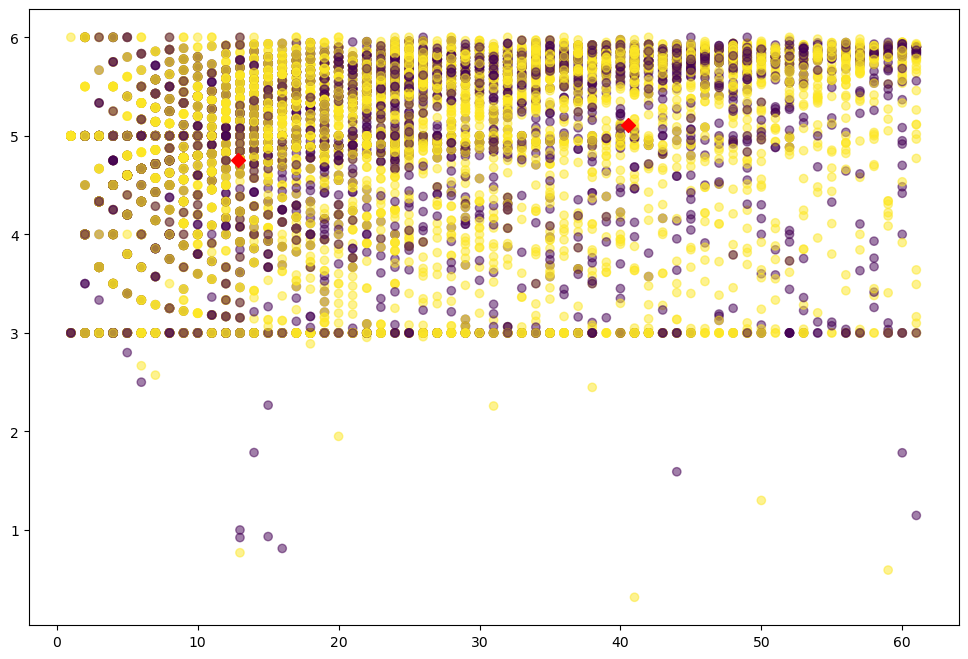

In [75]:
centers = pd.DataFrame(model.cluster_centers_, columns=['WINDOW', 'SCALED_SCORE'])
center_x = centers['WINDOW']
center_y = centers['SCALED_SCORE']

plt.figure(figsize=(12, 8))
plt.scatter(feature['WINDOW'], feature['SCALED_SCORE'],
            c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

#### 군집 3개

In [79]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(feature)

KMeans(n_clusters=3)

In [80]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature

,WINDOW,SCALED_SCORE,cluster
0,16.0,5.625000,2.0
16,30.0,4.166667,0.0
46,5.0,3.800000,0.0
51,17.0,4.647059,1.0
68,6.0,5.000000,1.0
...,...,...,...
9704,NaN,NaN,1.0
9705,NaN,NaN,1.0
9706,NaN,NaN,1.0
9707,NaN,NaN,1.0


In [81]:
feature.to_csv('feature.csv', index=False)

In [82]:
feature = pd.read_csv('feature.csv')
feature

,WINDOW,SCALED_SCORE,cluster
0,16,5.625000,2
1,30,4.166667,0
2,5,3.800000,0
3,17,4.647059,1
4,6,5.000000,1
...,...,...,...
9704,21,4.809524,1
9705,20,5.000000,1
9706,22,4.454545,1
9707,33,3.818182,1


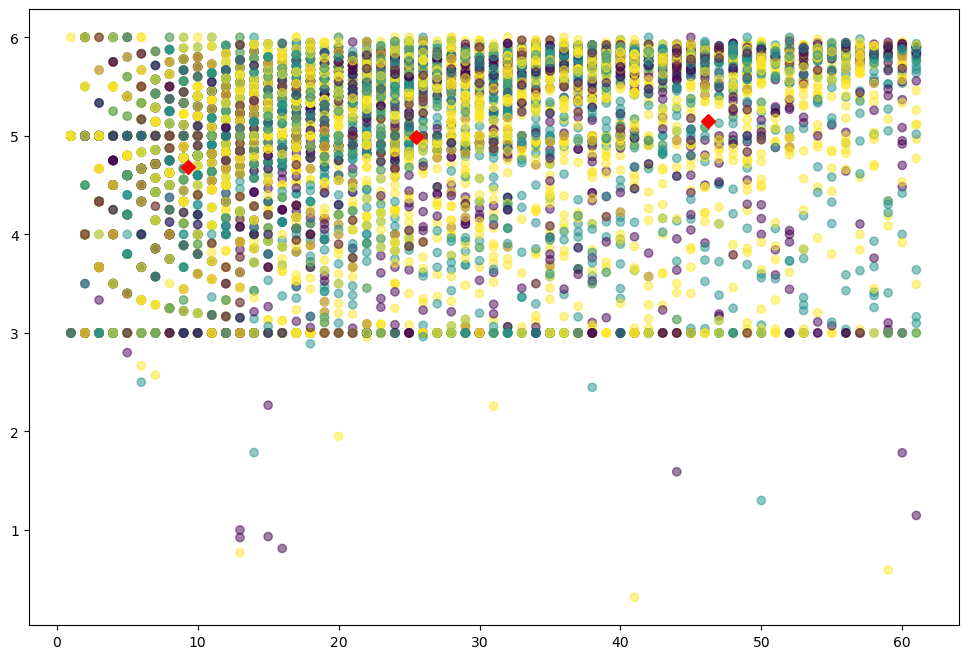

In [83]:
centers = pd.DataFrame(model.cluster_centers_, columns=['WINDOW', 'SCALED_SCORE'])
center_x = centers['WINDOW']
center_y = centers['SCALED_SCORE']

plt.figure(figsize=(12, 8))
plt.scatter(feature['WINDOW'], feature['SCALED_SCORE'],
            c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

## 상관관계 분석

In [84]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9709 entries, 0 to 219159
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             9709 non-null   int64  
 1   Gender         9709 non-null   object 
 2   Car            9709 non-null   object 
 3   Reality        9709 non-null   object 
 4   ChildNo        9709 non-null   int64  
 5   Income         9709 non-null   float64
 6   IncomeType     9709 non-null   object 
 7   Edutype        9709 non-null   object 
 8   FamilyType     9709 non-null   object 
 9   HouseType      9709 non-null   object 
 10  DAYS_BIRTH     9709 non-null   int64  
 11  DAYS_EMPLOYED  9709 non-null   int64  
 12  FLAG_MOBIL     9709 non-null   int64  
 13  Wkphone        9709 non-null   int64  
 14  Phone          9709 non-null   int64  
 15  Email          9709 non-null   int64  
 16  Occupy         9709 non-null   object 
 17  FamilySize     9709 non-null   float64
 18  WINDOW     

In [85]:
client = pd.get_dummies(merge_df, columns=['Gender', 'Car', 'Reality', 'IncomeType', 'Edutype', 'FamilyType', 'HouseType', 'Occupy'])
client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9709 entries, 0 to 219159
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     9709 non-null   int64  
 1   ChildNo                                9709 non-null   int64  
 2   Income                                 9709 non-null   float64
 3   DAYS_BIRTH                             9709 non-null   int64  
 4   DAYS_EMPLOYED                          9709 non-null   int64  
 5   FLAG_MOBIL                             9709 non-null   int64  
 6   Wkphone                                9709 non-null   int64  
 7   Phone                                  9709 non-null   int64  
 8   Email                                  9709 non-null   int64  
 9   FamilySize                             9709 non-null   float64
 10  WINDOW                                 9709 non-null   int64  
 11  SCALED_

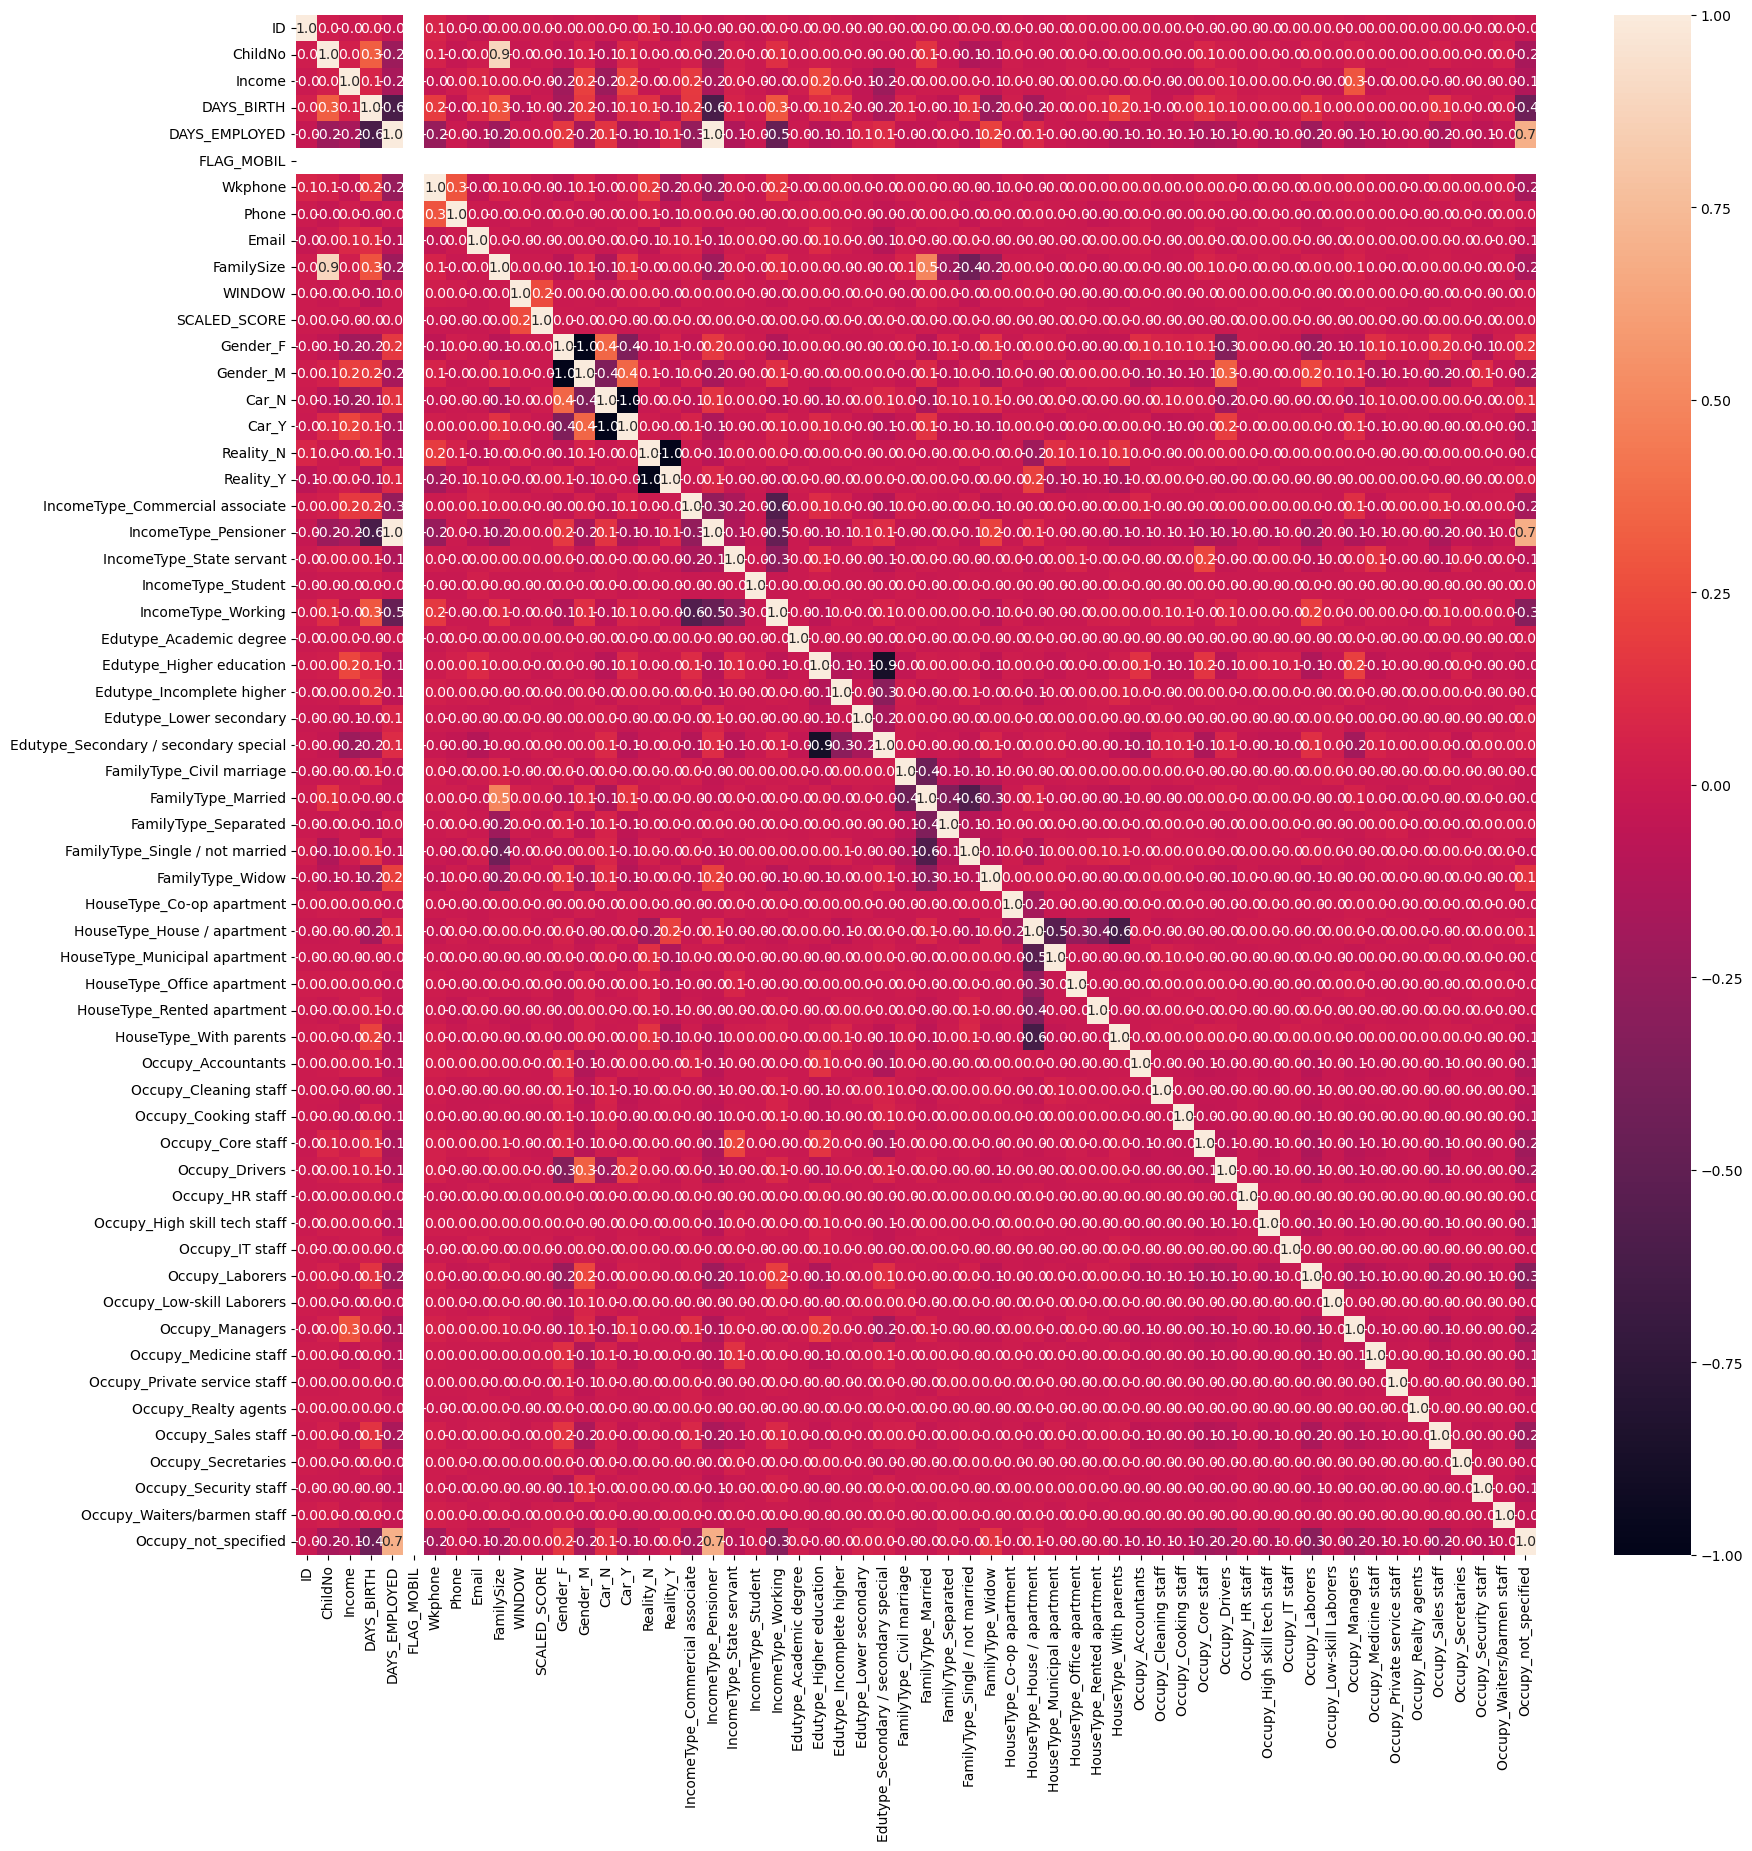

In [86]:
plt.figure(figsize=(20, 20))
sns.heatmap(client.corr(), cmap='rocket', fmt='.1f', annot=True, vmin=-1, vmax=1);

## 처음으로 돌아가자..

In [87]:
application = pd.read_csv('../data/application_record.csv')
application.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Car', 'FLAG_OWN_REALTY': 'Reality',
                                'CNT_CHILDREN': 'ChildNo', 'AMT_INCOME_TOTAL': 'Income',
                                'NAME_EDUCATION_TYPE': 'Edutype', 'NAME_FAMILY_STATUS': 'FamilyType',
                                'NAME_HOUSING_TYPE': 'HouseType', 'FLAG_EMAIL': 'Email',
                                'NAME_INCOME_TYPE': 'IncomeType', 'FLAG_WORK_PHONE': 'Wkphone',
                                'FLAG_PHONE': 'Phone', 'CNT_FAM_MEMBERS': 'FamilySize',
                                'OCCUPATION_TYPE': 'Occupy'}, inplace=True)
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             438557 non-null  int64  
 1   Gender         438557 non-null  object 
 2   Car            438557 non-null  object 
 3   Reality        438557 non-null  object 
 4   ChildNo        438557 non-null  int64  
 5   Income         438557 non-null  float64
 6   IncomeType     438557 non-null  object 
 7   Edutype        438557 non-null  object 
 8   FamilyType     438557 non-null  object 
 9   HouseType      438557 non-null  object 
 10  DAYS_BIRTH     438557 non-null  int64  
 11  DAYS_EMPLOYED  438557 non-null  int64  
 12  FLAG_MOBIL     438557 non-null  int64  
 13  Wkphone        438557 non-null  int64  
 14  Phone          438557 non-null  int64  
 15  Email          438557 non-null  int64  
 16  Occupy         304354 non-null  object 
 17  FamilySize     438557 non-nul

## Countplot

### 자녀의 수

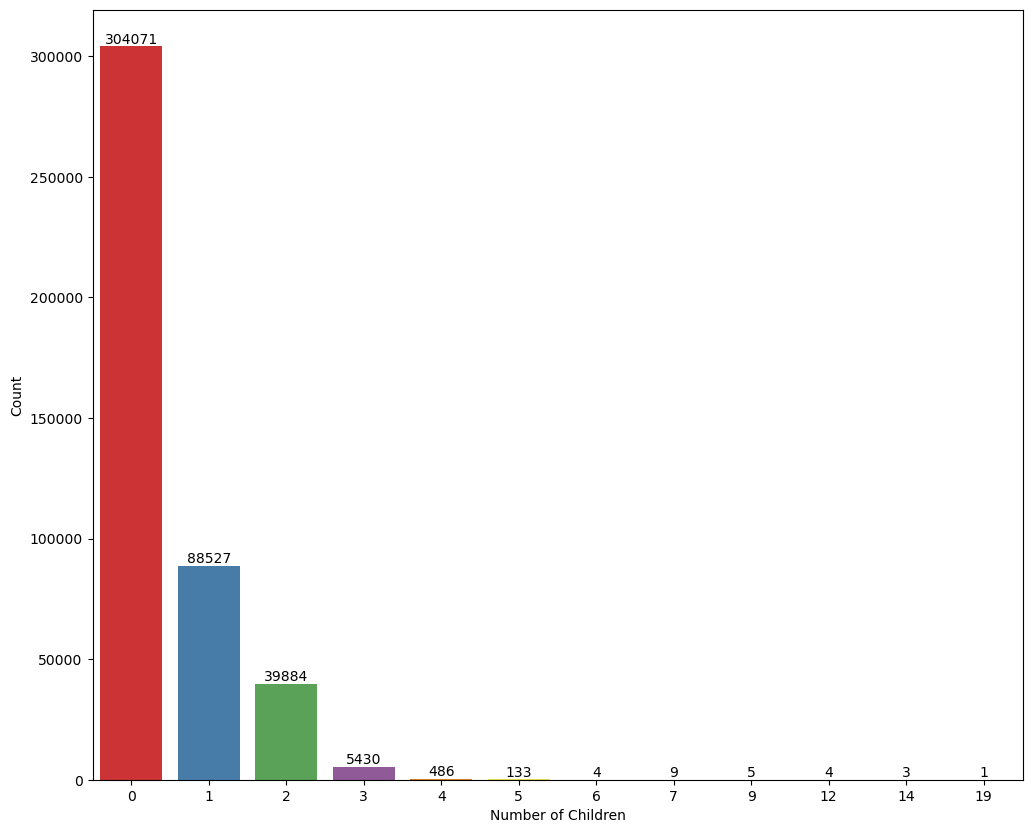

In [92]:
plt.figure(figsize=(12, 10))

ax = sns.countplot(x='ChildNo', data = application, palette='Set1')
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    
ax.set_ylabel("Count")
ax.set_xlabel("Number of Children")

plt.show()


### 가족의 수

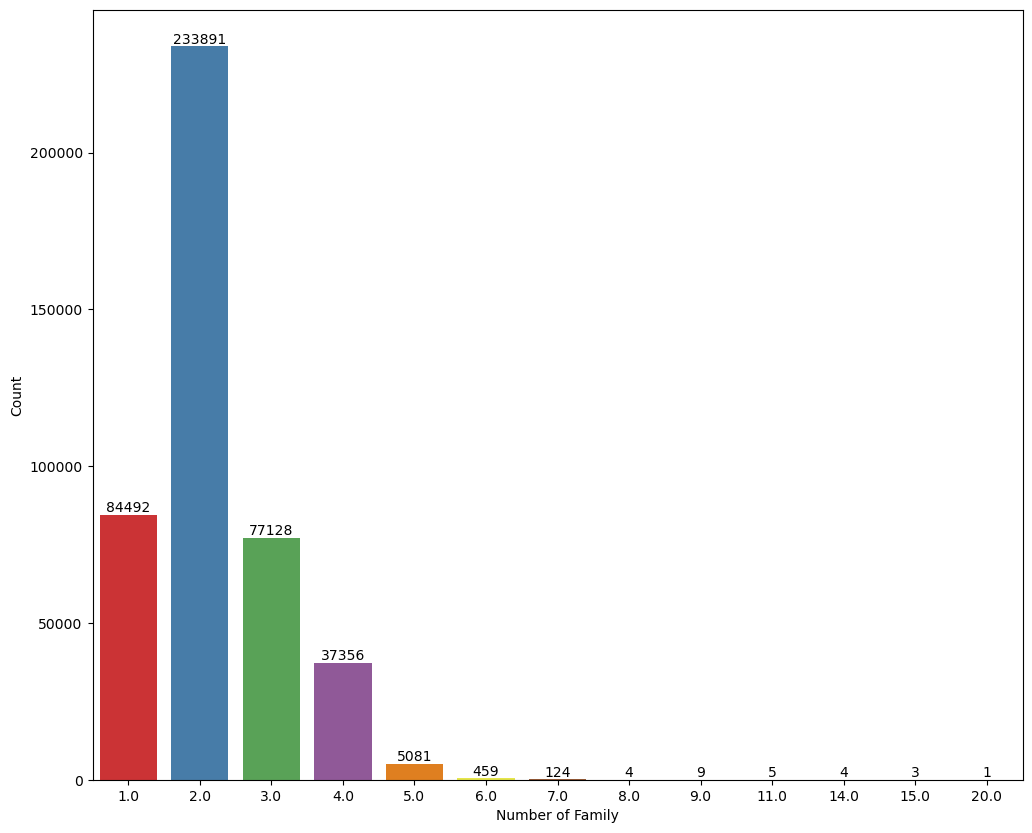

In [94]:
plt.figure(figsize=(12, 10))

ax = sns.countplot(x='FamilySize', data = application, palette='Set1')
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    
ax.set_ylabel("Count")
ax.set_xlabel("Number of Family")

plt.show()

## Boxplots and Histograms

### 연간 소득

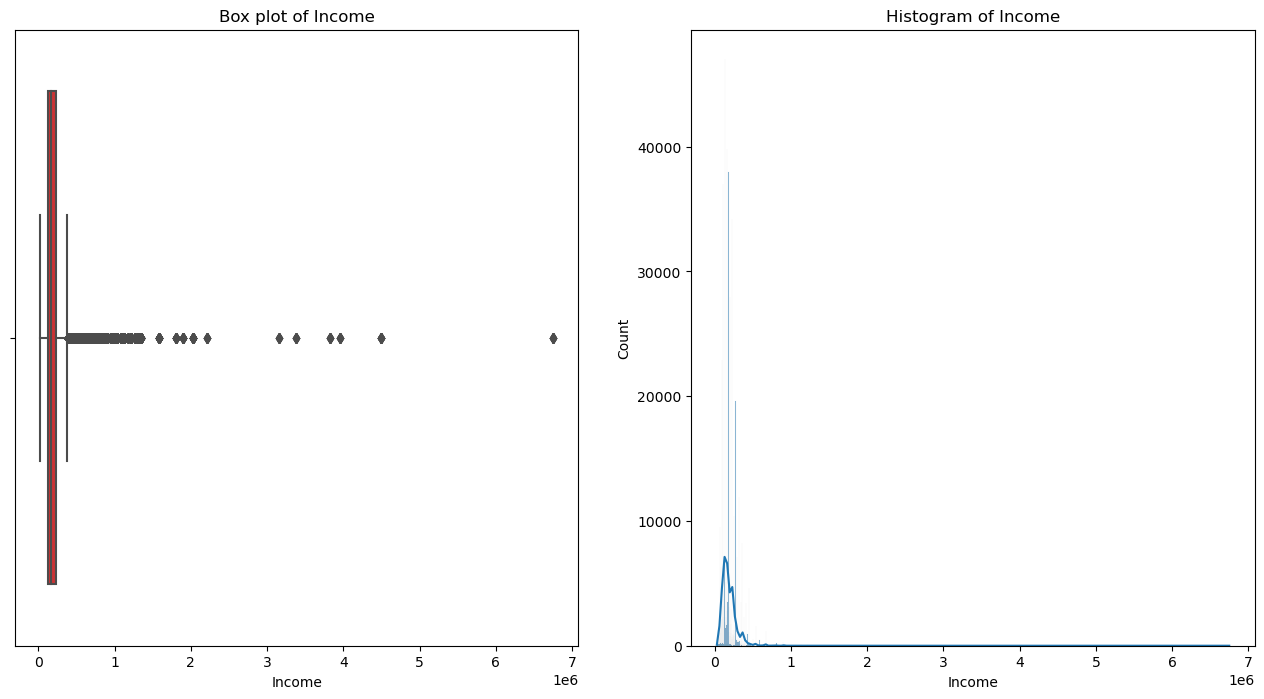

In [97]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Income', data=application, palette='Set1')
plt.title('Box plot of Income')

plt.subplot(1, 2, 2)
sns.histplot(application['Income'], kde=True, palette='Set1')
plt.title('Histogram of Income')

plt.show()

In [99]:
application['Income'].describe()

count    4.385570e+05
mean     1.875243e+05
std      1.100869e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.607805e+05
75%      2.250000e+05
max      6.750000e+06
Name: Income, dtype: float64

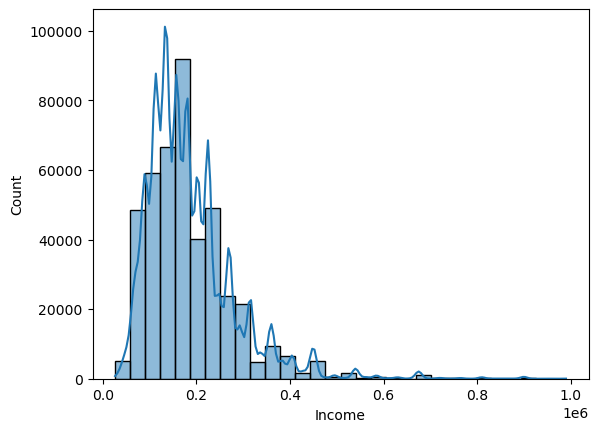

In [108]:
sns.histplot(application[application['Income'] <= 1000000]['Income'], kde=True, bins=30, palette='Set1');

In [102]:
application[application['Income'] <= 1000000]['Income'].describe()

count    438127.000000
mean     186132.246781
std       95749.993879
min       26100.000000
25%      121500.000000
50%      157500.000000
75%      225000.000000
max      990000.000000
Name: Income, dtype: float64

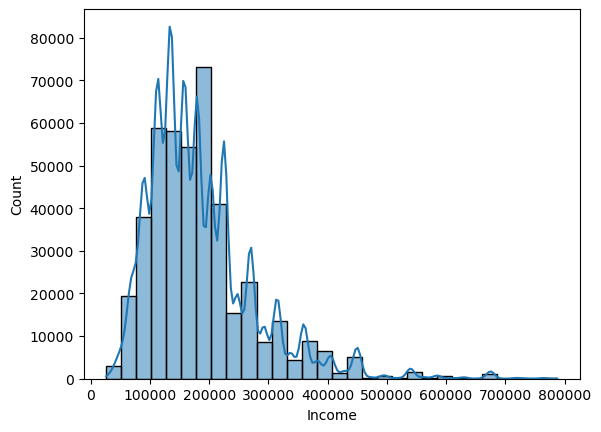

In [107]:
sns.histplot(application[application['Income'] <= 800000]['Income'], kde=True, bins=30, palette='Set1');

In [111]:
application[application['Income'] <= 600000].shape

(435668, 18)

In [112]:
(435668/438557)*100

99.34124868603169

In [113]:
application = application[application['Income'] <= 600000]
application.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435668 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             435668 non-null  int64  
 1   Gender         435668 non-null  object 
 2   Car            435668 non-null  object 
 3   Reality        435668 non-null  object 
 4   ChildNo        435668 non-null  int64  
 5   Income         435668 non-null  float64
 6   IncomeType     435668 non-null  object 
 7   Edutype        435668 non-null  object 
 8   FamilyType     435668 non-null  object 
 9   HouseType      435668 non-null  object 
 10  DAYS_BIRTH     435668 non-null  int64  
 11  DAYS_EMPLOYED  435668 non-null  int64  
 12  FLAG_MOBIL     435668 non-null  int64  
 13  Wkphone        435668 non-null  int64  
 14  Phone          435668 non-null  int64  
 15  Email          435668 non-null  int64  
 16  Occupy         301998 non-null  object 
 17  FamilySize     435668 non-null  fl

### Days_Employed

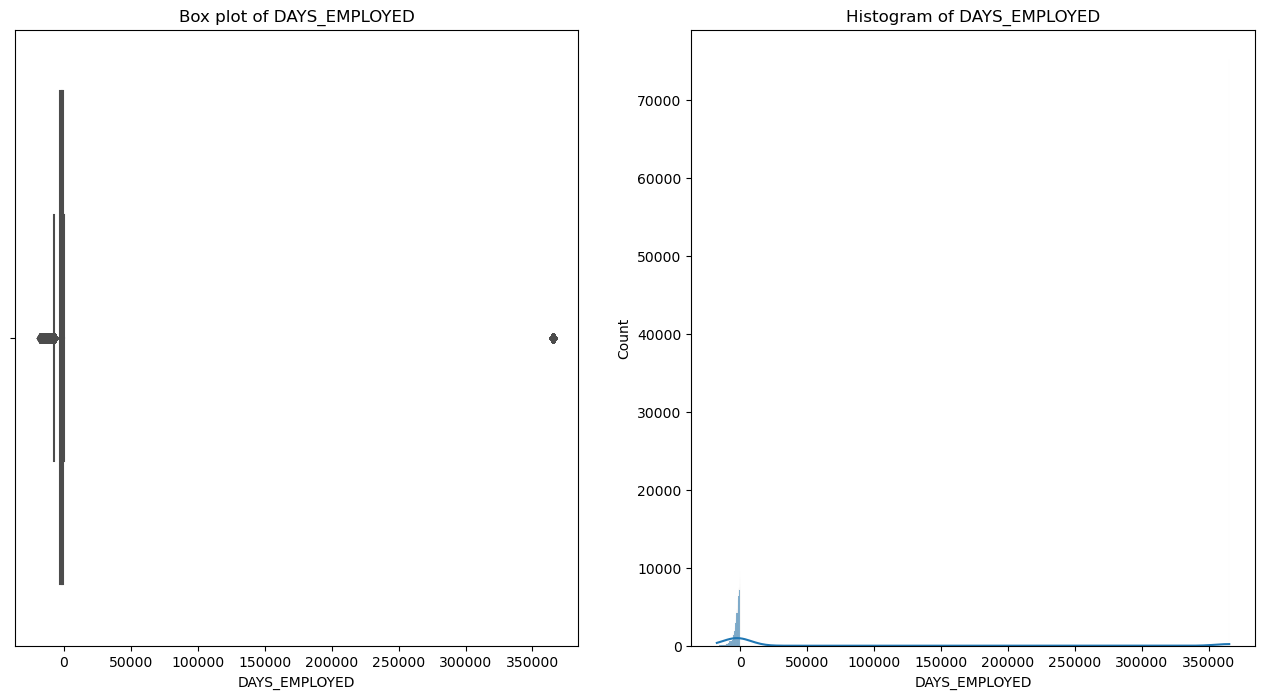

In [114]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='DAYS_EMPLOYED', data=application, palette='Set1')
plt.title('Box plot of DAYS_EMPLOYED')

plt.subplot(1, 2, 2)
sns.histplot(application['DAYS_EMPLOYED'], kde=True, palette='Set1')
plt.title('Histogram of DAYS_EMPLOYED')

plt.show()

In [115]:
application['DAYS_EMPLOYED'].describe()

count    435668.000000
mean      60867.820205
std      139030.779748
min      -17531.000000
25%       -3101.000000
50%       -1463.000000
75%        -367.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [116]:
len(application[application['DAYS_EMPLOYED']==365243])

75192

In [117]:
days_employed_365243 = application[application['DAYS_EMPLOYED']==365243]
application = application[application['DAYS_EMPLOYED']!=365243]
application.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360476 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             360476 non-null  int64  
 1   Gender         360476 non-null  object 
 2   Car            360476 non-null  object 
 3   Reality        360476 non-null  object 
 4   ChildNo        360476 non-null  int64  
 5   Income         360476 non-null  float64
 6   IncomeType     360476 non-null  object 
 7   Edutype        360476 non-null  object 
 8   FamilyType     360476 non-null  object 
 9   HouseType      360476 non-null  object 
 10  DAYS_BIRTH     360476 non-null  int64  
 11  DAYS_EMPLOYED  360476 non-null  int64  
 12  FLAG_MOBIL     360476 non-null  int64  
 13  Wkphone        360476 non-null  int64  
 14  Phone          360476 non-null  int64  
 15  Email          360476 non-null  int64  
 16  Occupy         301998 non-null  object 
 17  FamilySize     360476 non-null  fl

### Days_Birth

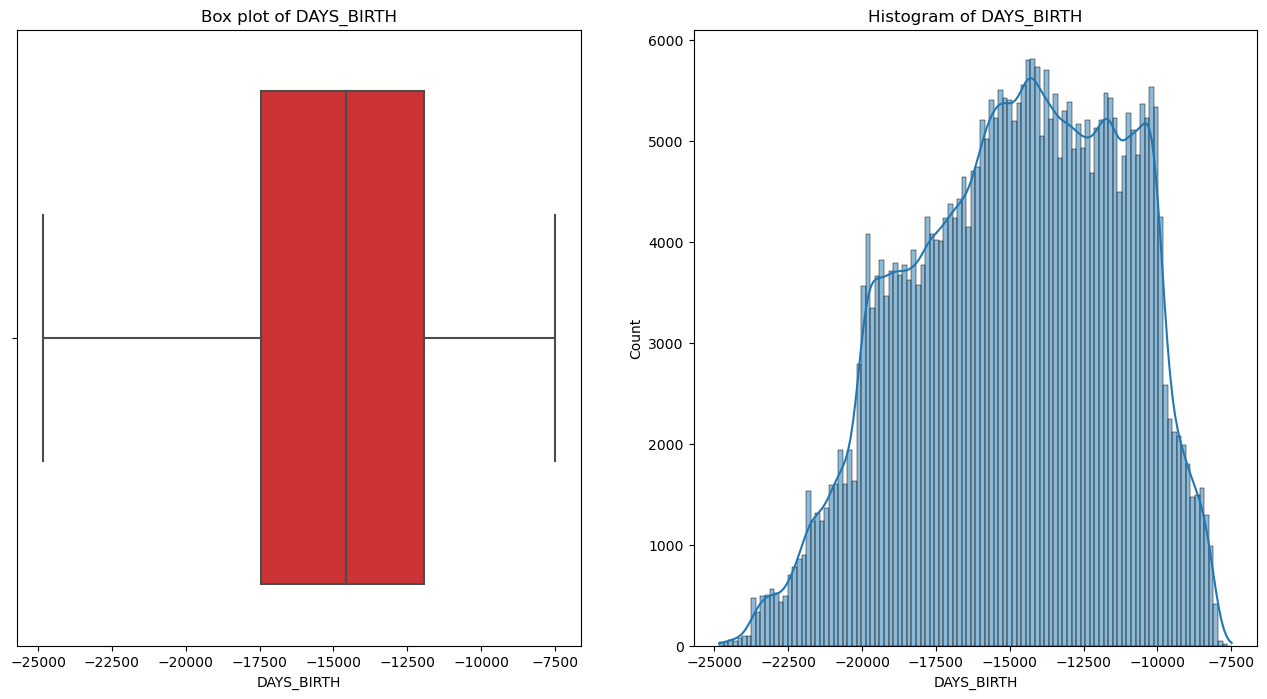

In [118]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='DAYS_BIRTH', data=application, palette='Set1')
plt.title('Box plot of DAYS_BIRTH')

plt.subplot(1, 2, 2)
sns.histplot(application['DAYS_BIRTH'], kde=True, palette='Set1')
plt.title('Histogram of DAYS_BIRTH')

plt.show()

In [122]:
application['DAYS_BIRTH'] = abs(application['DAYS_BIRTH']) / 365
application['DAYS_EMPLOYED'] = abs(application['DAYS_EMPLOYED']) / 365

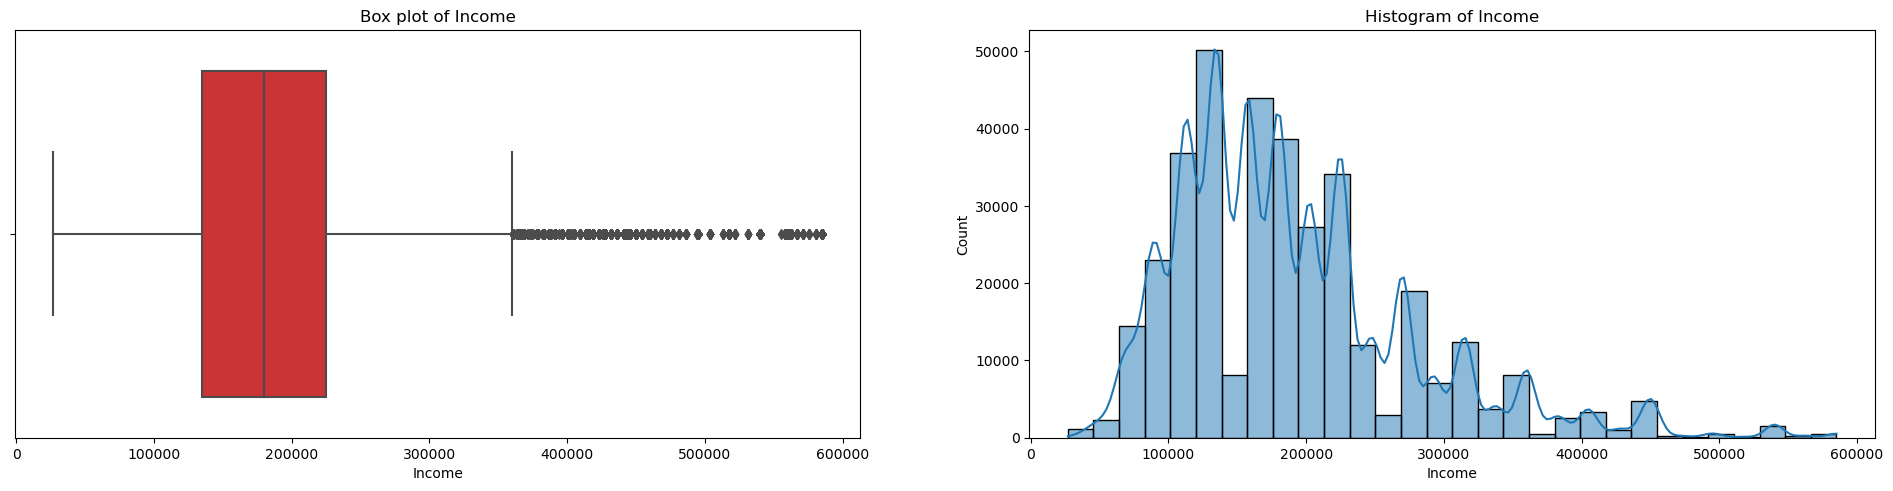

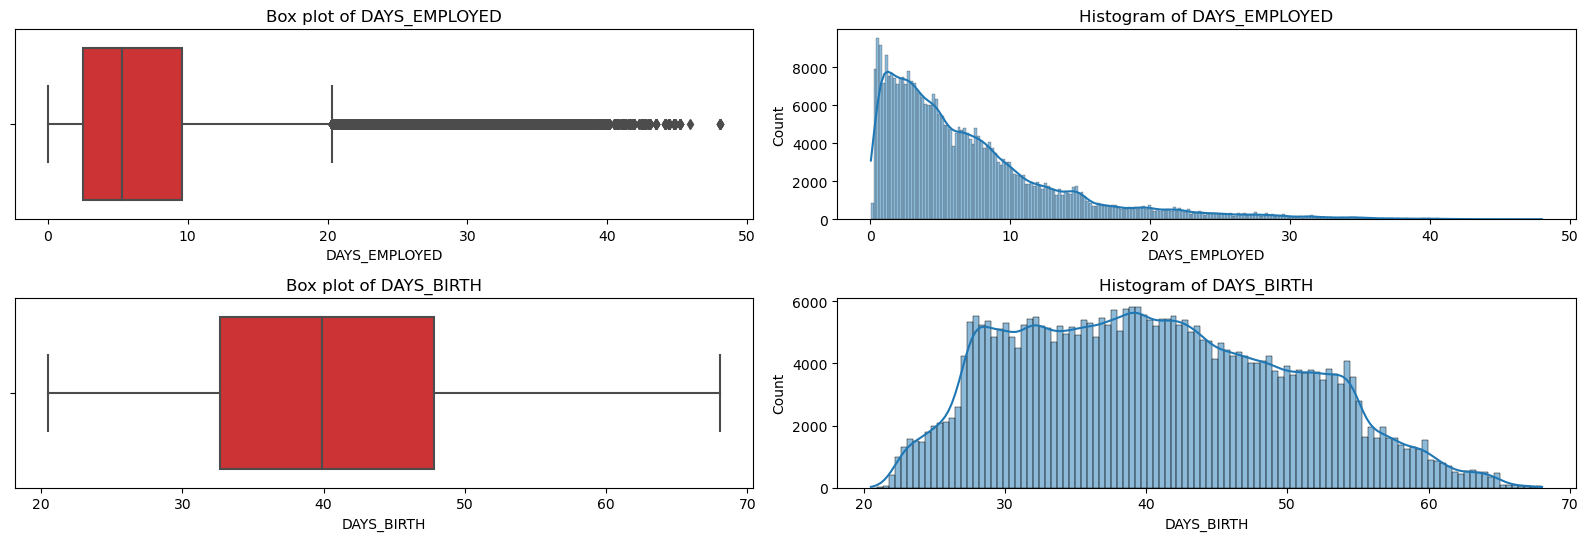

In [127]:
plt.figure(figsize=(24, 18))

plt.subplot(3, 2, 1)
sns.boxplot(x='Income', data=application, palette='Set1')
plt.title('Box plot of Income')

plt.subplot(3, 2, 2)
sns.histplot(application['Income'], kde=True, palette='Set1', bins=30)
plt.title('Histogram of Income')

plt.figure(figsize=(16, 8))

plt.subplot(3, 2, 3)
sns.boxplot(x='DAYS_EMPLOYED', data=application, palette='Set1')
plt.title('Box plot of DAYS_EMPLOYED')

plt.subplot(3, 2, 4)
sns.histplot(application['DAYS_EMPLOYED'], kde=True, palette='Set1')
plt.title('Histogram of DAYS_EMPLOYED')

plt.subplot(3, 2, 5)
sns.boxplot(x='DAYS_BIRTH', data=application, palette='Set1')
plt.title('Box plot of DAYS_BIRTH')

plt.subplot(3, 2, 6)
sns.histplot(application['DAYS_BIRTH'], kde=True, palette='Set1')
plt.title('Histogram of DAYS_BIRTH')

plt.tight_layout()
plt.show()

## Countplot

In [128]:
cat_cols = ['FLAG_MOBIL', 'Wkphone', 'Phone', 'Email', 'Occupy', 'Gender', 
            'Reality', 'Car', 'IncomeType', 'Edutype', 
            'FamilyType', 'HouseType']

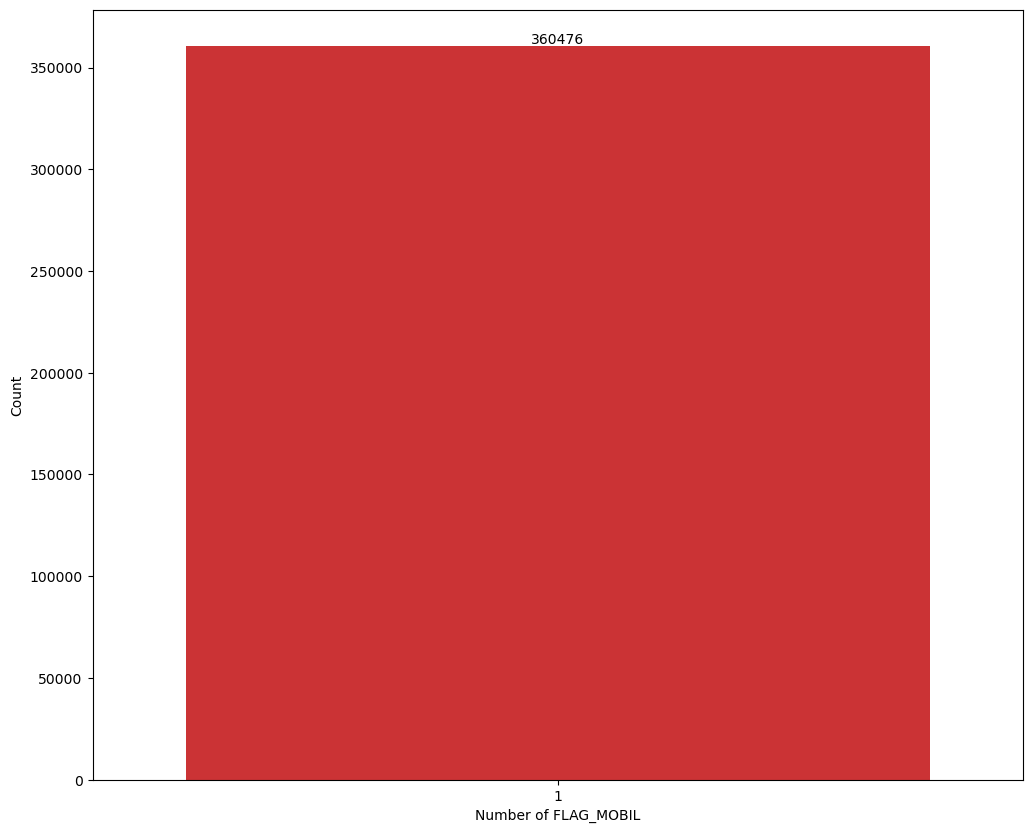

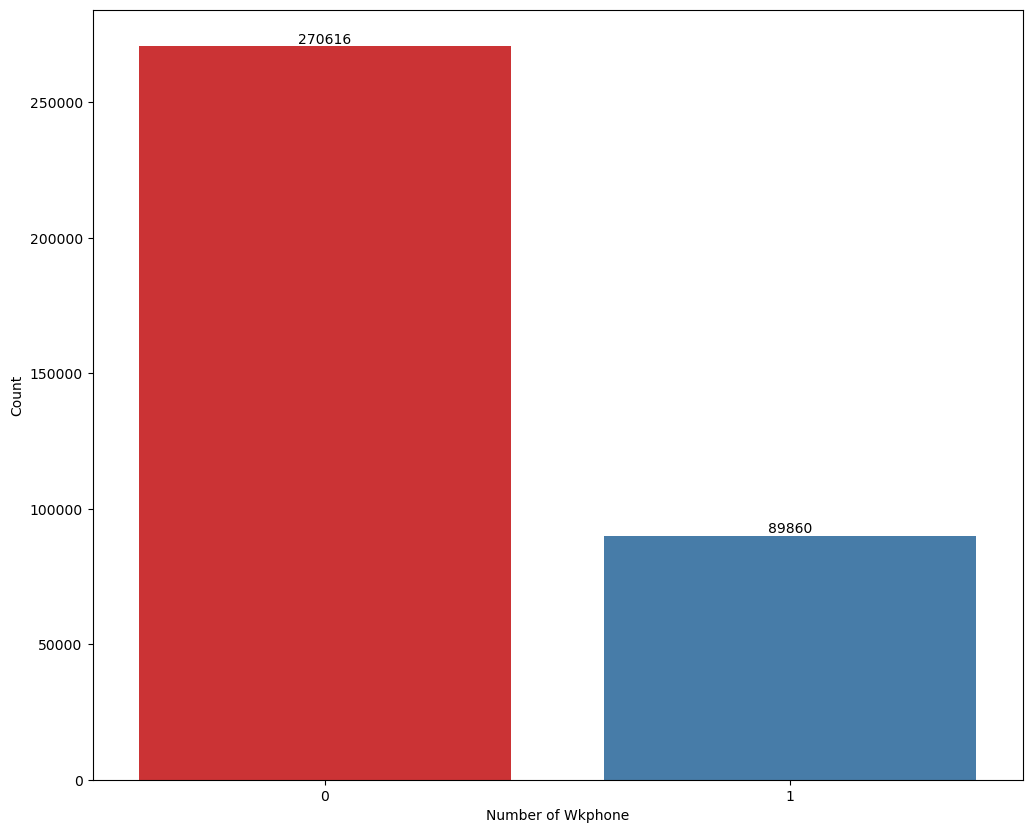

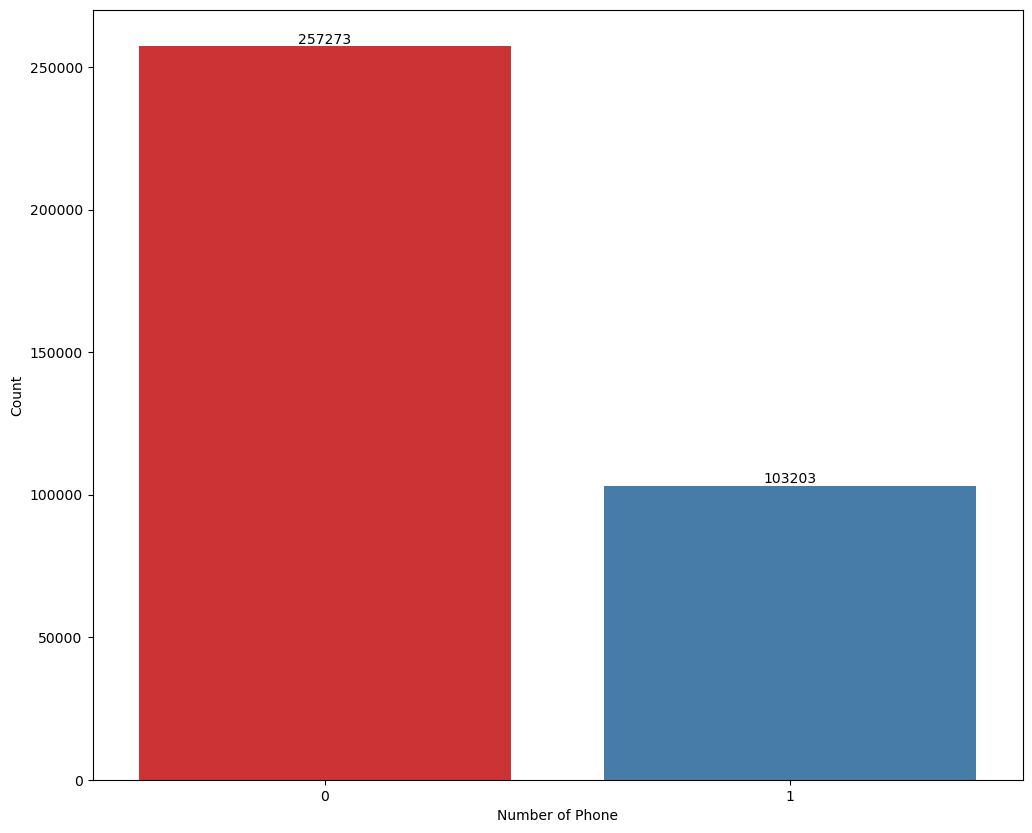

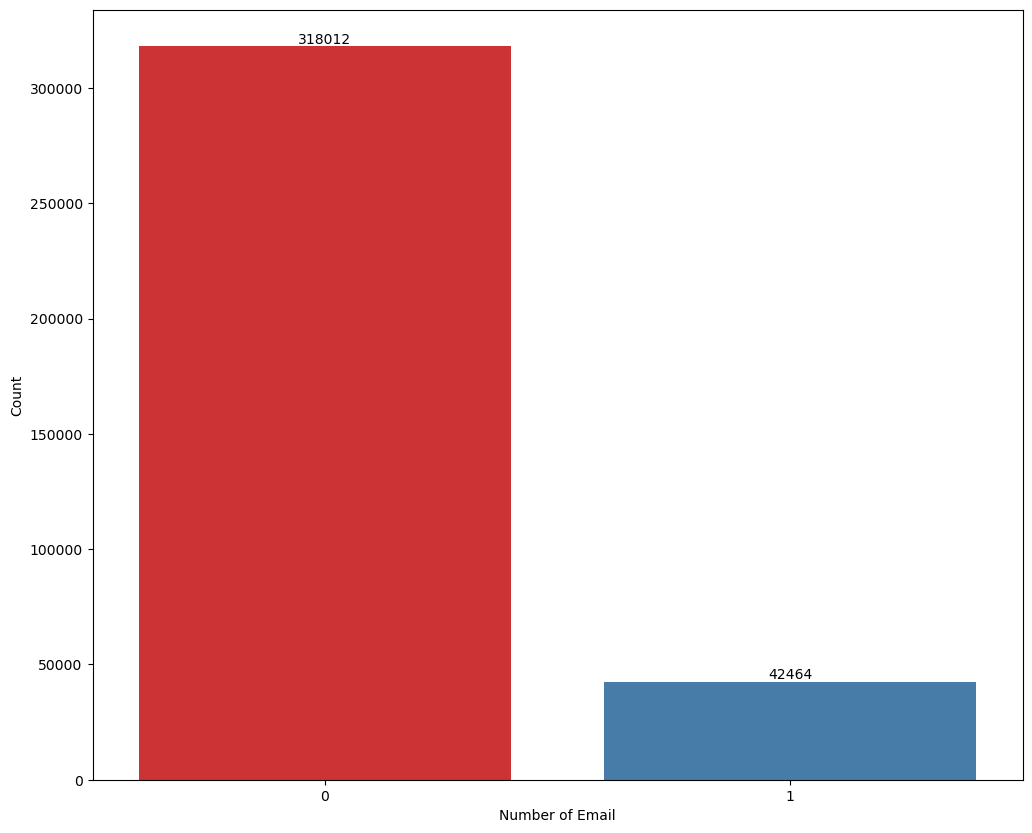

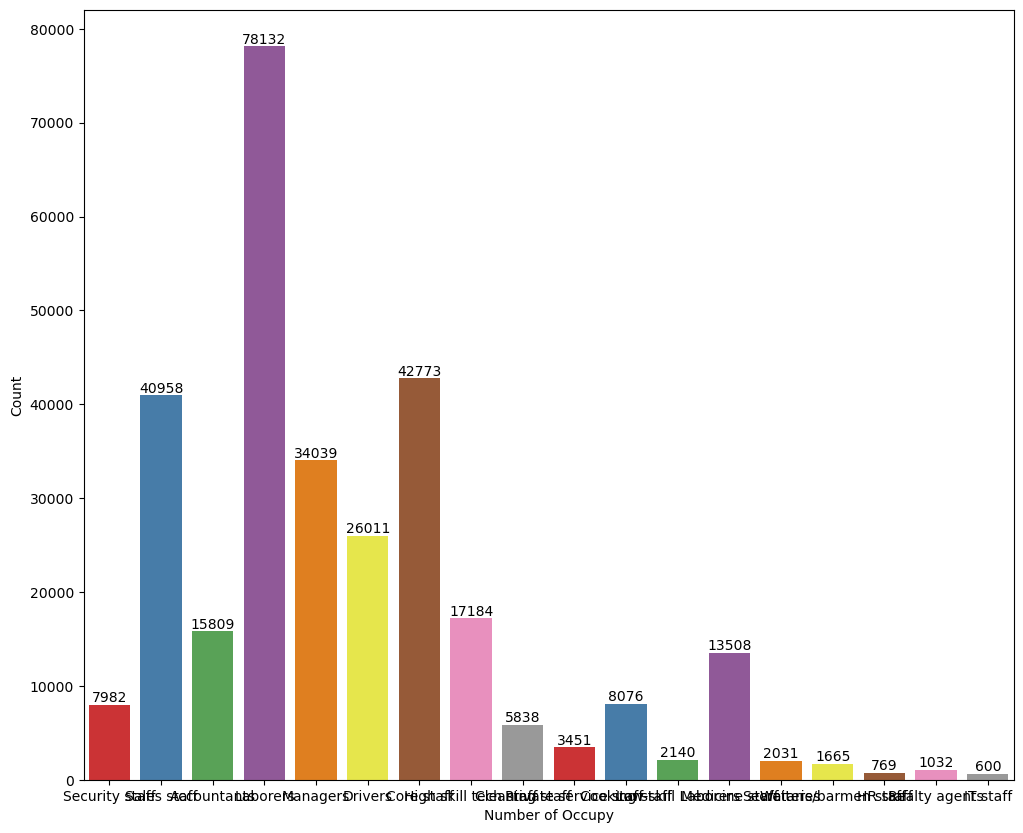

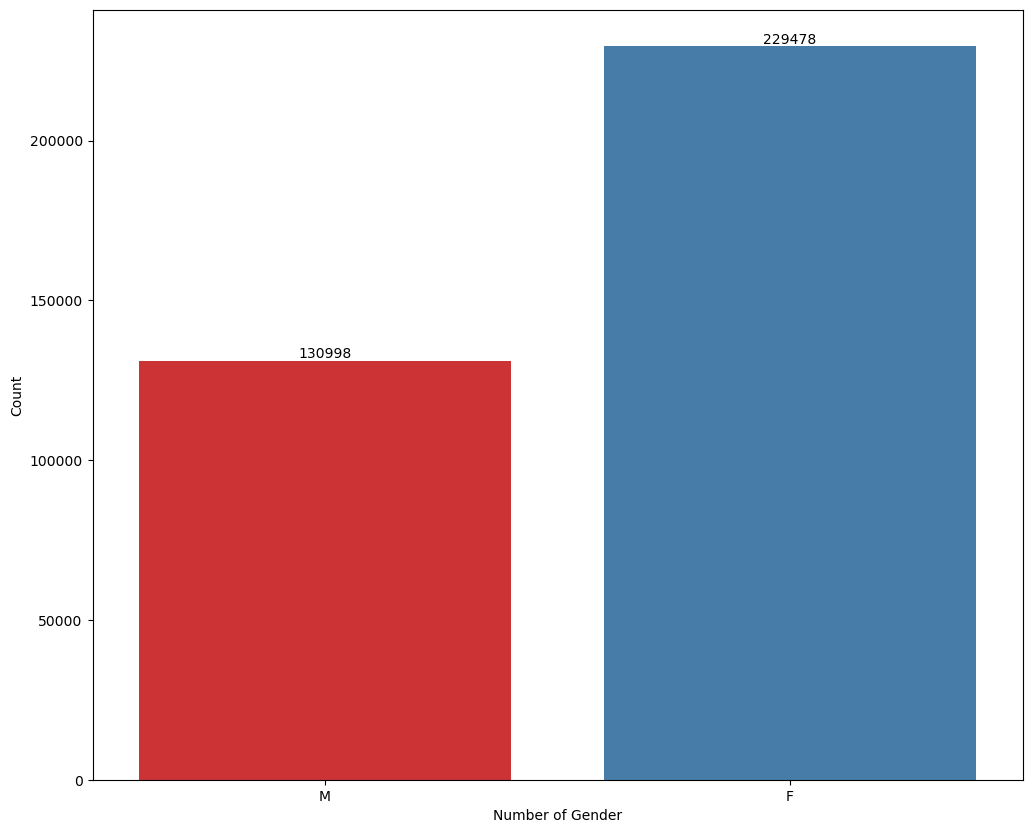

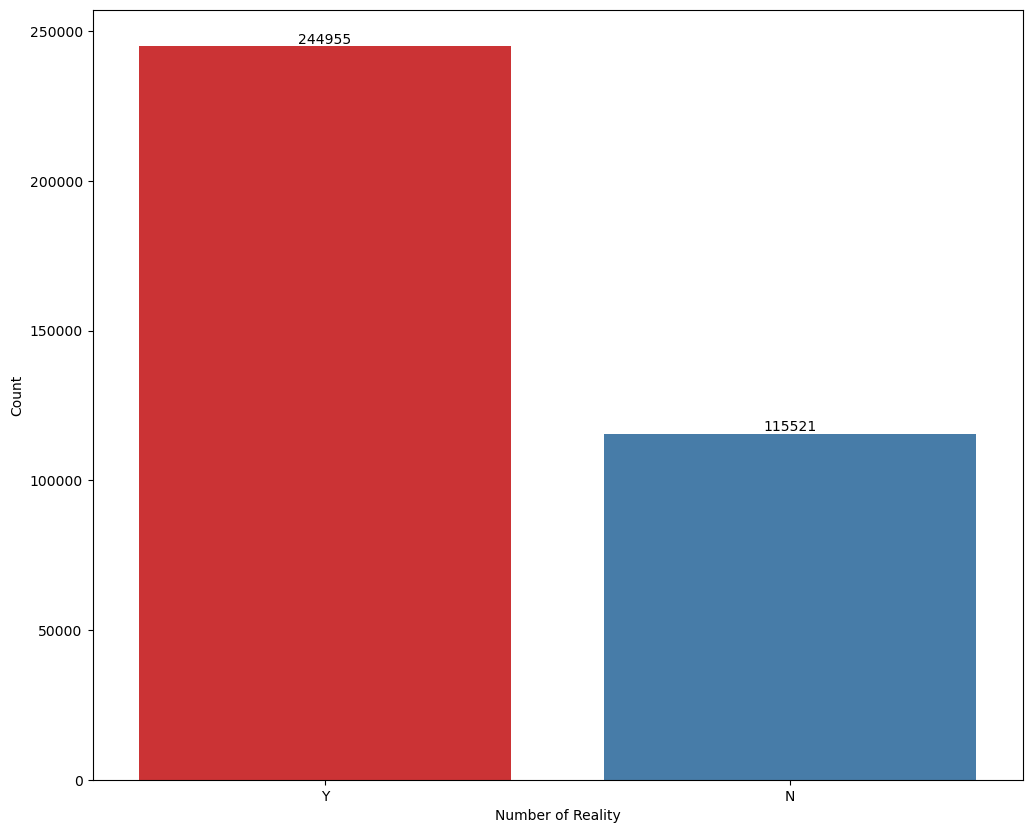

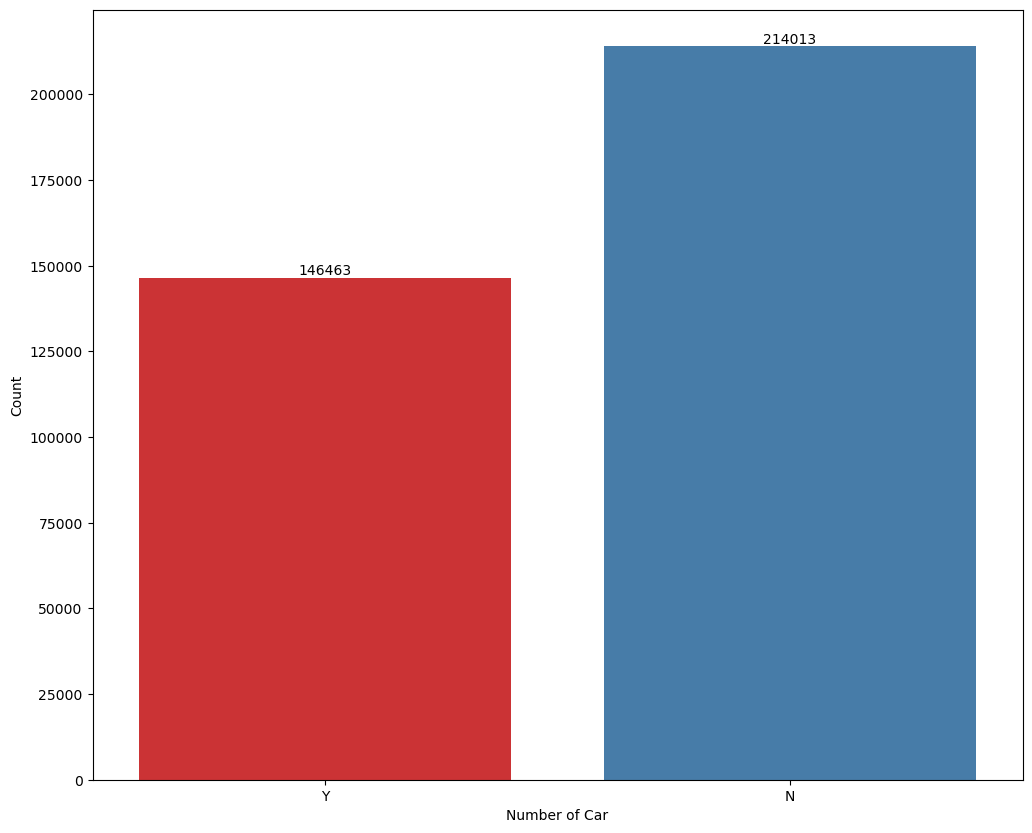

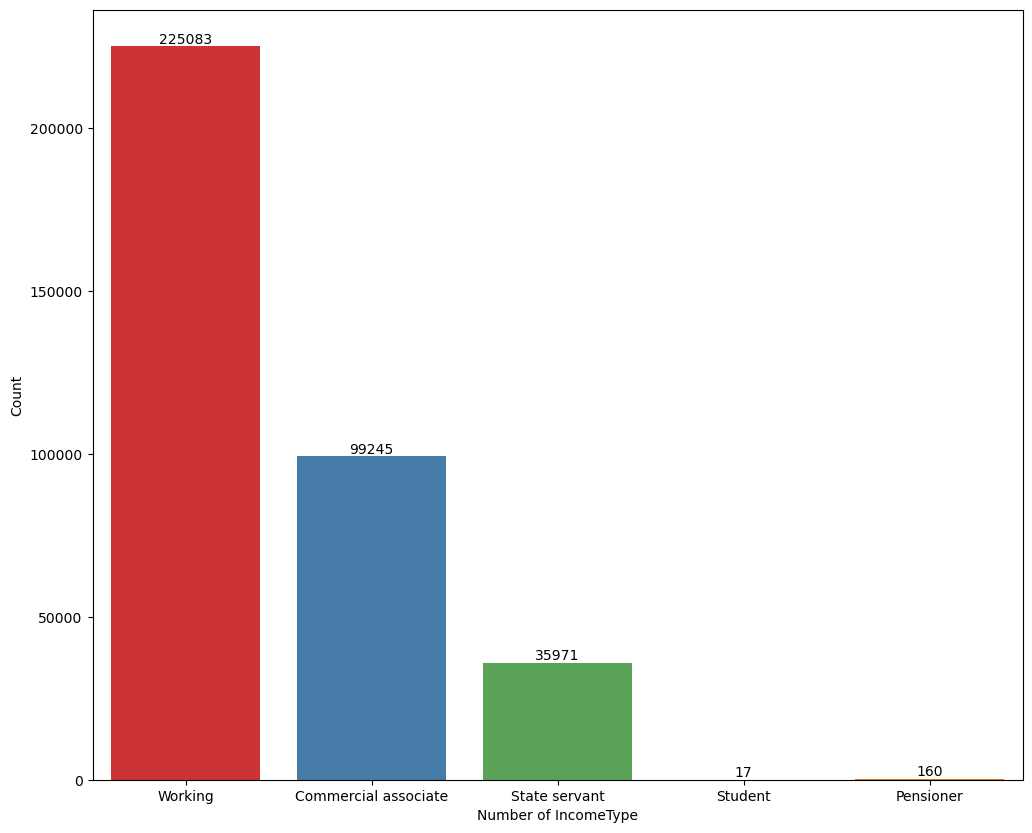

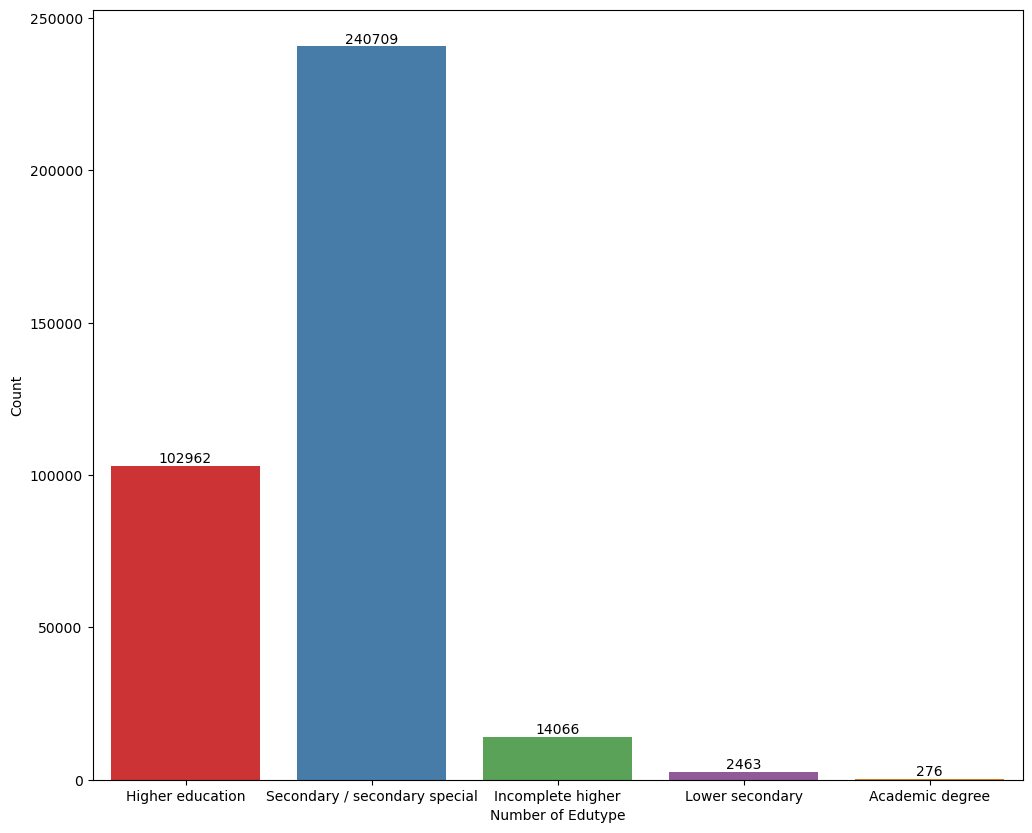

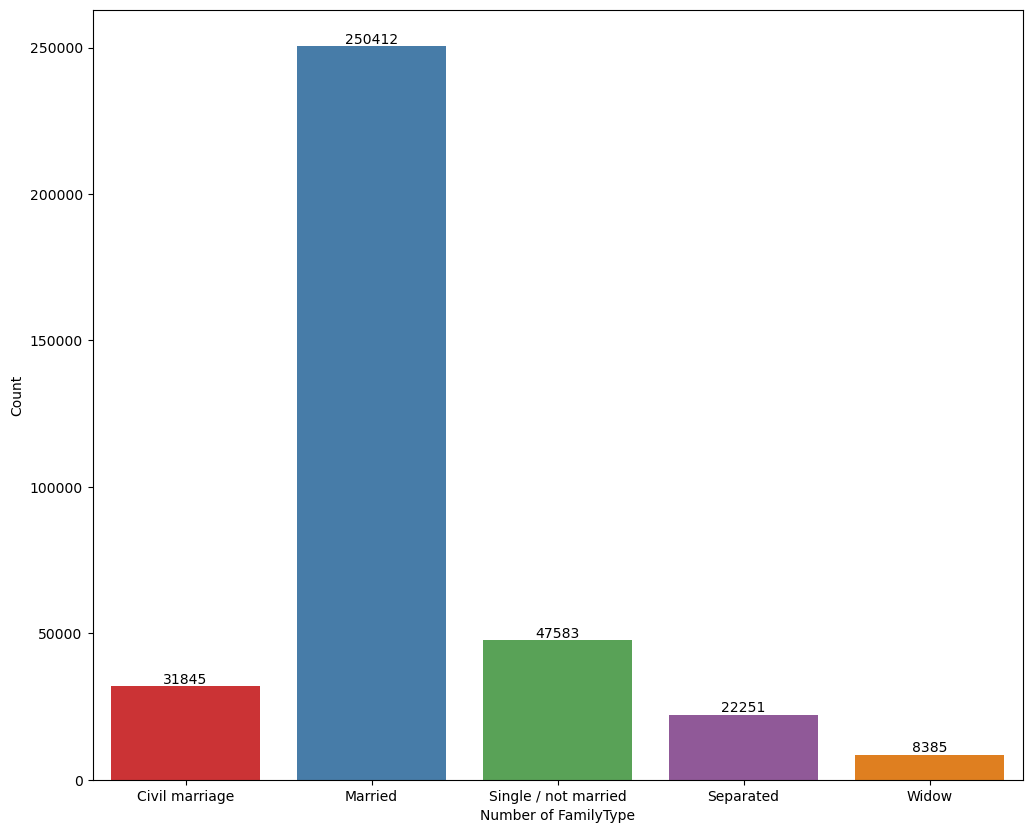

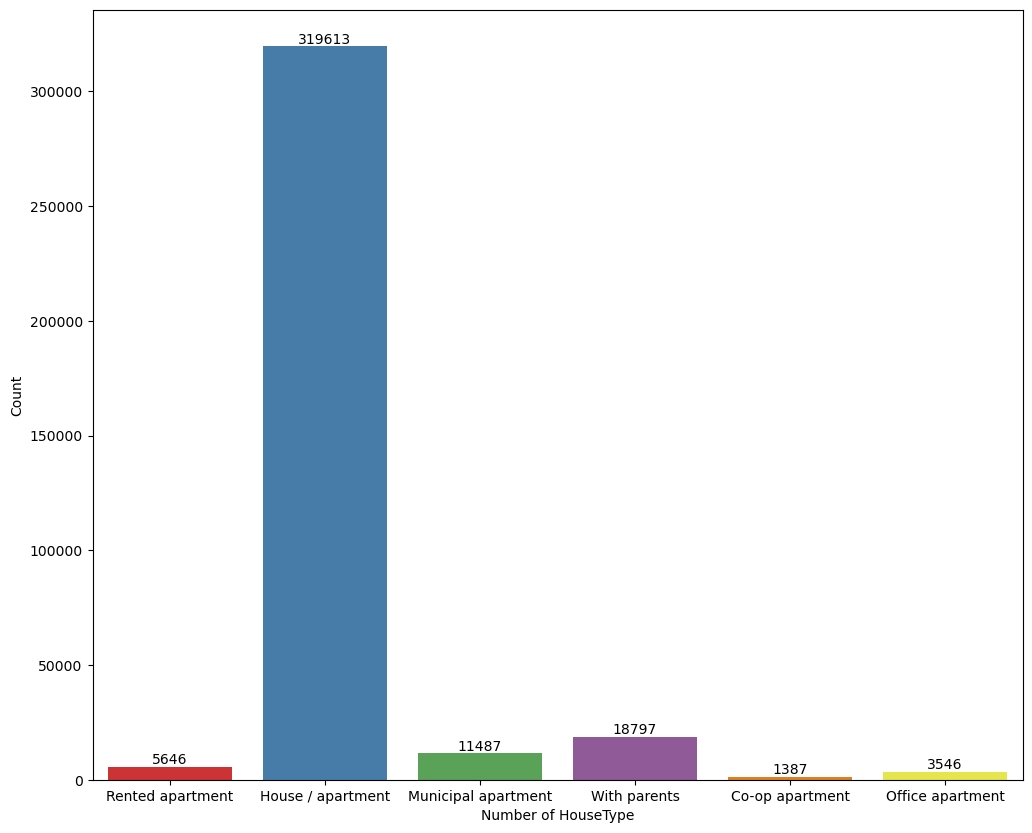

In [129]:
for column in cat_cols:
    plt.figure(figsize=(12, 10))

    ax = sns.countplot(x=f'{column}', data=application, palette='Set1')
    ax.bar_label(ax.containers[0])
    for p in ax.patches:
        height = p.get_height()
        
    ax.set_ylabel("Count")
    ax.set_xlabel(f"Number of {column}")

    plt.show()

In [130]:
application['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    360476
Name: count, dtype: int64

In [131]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360476 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             360476 non-null  int64  
 1   Gender         360476 non-null  object 
 2   Car            360476 non-null  object 
 3   Reality        360476 non-null  object 
 4   ChildNo        360476 non-null  int64  
 5   Income         360476 non-null  float64
 6   IncomeType     360476 non-null  object 
 7   Edutype        360476 non-null  object 
 8   FamilyType     360476 non-null  object 
 9   HouseType      360476 non-null  object 
 10  DAYS_BIRTH     360476 non-null  float64
 11  DAYS_EMPLOYED  360476 non-null  float64
 12  FLAG_MOBIL     360476 non-null  int64  
 13  Wkphone        360476 non-null  int64  
 14  Phone          360476 non-null  int64  
 15  Email          360476 non-null  int64  
 16  Occupy         301998 non-null  object 
 17  FamilySize     360476 non-null  fl

## 결측치 제거

In [132]:
application.dropna(inplace=True)
application.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301998 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             301998 non-null  int64  
 1   Gender         301998 non-null  object 
 2   Car            301998 non-null  object 
 3   Reality        301998 non-null  object 
 4   ChildNo        301998 non-null  int64  
 5   Income         301998 non-null  float64
 6   IncomeType     301998 non-null  object 
 7   Edutype        301998 non-null  object 
 8   FamilyType     301998 non-null  object 
 9   HouseType      301998 non-null  object 
 10  DAYS_BIRTH     301998 non-null  float64
 11  DAYS_EMPLOYED  301998 non-null  float64
 12  FLAG_MOBIL     301998 non-null  int64  
 13  Wkphone        301998 non-null  int64  
 14  Phone          301998 non-null  int64  
 15  Email          301998 non-null  int64  
 16  Occupy         301998 non-null  object 
 17  FamilySize     301998 non-null  fl

## Column Mapping

In [133]:
for col in cat_cols:
    print(f'{col}: {application[col].unique()}')

FLAG_MOBIL: [1]
Wkphone: [0 1]
Phone: [0 1]
Email: [0 1]
Occupy: ['Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
Gender: ['M' 'F']
Reality: ['Y' 'N']
Car: ['Y' 'N']
IncomeType: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
Edutype: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
FamilyType: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
HouseType: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [135]:
education_mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

application['Education_Level'] = application['Edutype'].map(education_mapping)
application.drop('Edutype', axis=1, inplace=True)
application['Education_Level'].value_counts()

Education_Level
2    204200
4     84003
3     11541
1      2039
5       215
Name: count, dtype: int64

In [136]:
application['Gender'] = application['Gender'].str.strip().str.upper()
application['Gender'] = application['Gender'].map({'M': 1, 'F': 0})
application['Reality'] = application['Reality'].str.strip().str.upper()
application['Reality'] = application['Reality'].map({'Y': 1, 'N': 0})
application['Car'] = application['Car'].str.strip().str.upper()
application['Car'] = application['Car'].map({'Y': 1, 'N': 0})

print(application['Gender'].value_counts())
print(application['Reality'].value_counts())
print(application['Car'].value_counts())

Gender
0    189360
1    112638
Name: count, dtype: int64
Reality
1    205963
0     96035
Name: count, dtype: int64
Car
0    177569
1    124429
Name: count, dtype: int64


In [137]:
cat_cols.append('Education_Level')
cat_cols.remove('Edutype')

for col in cat_cols:
    print(f'{col}: {application[col].unique()}')

FLAG_MOBIL: [1]
Wkphone: [0 1]
Phone: [0 1]
Email: [0 1]
Occupy: ['Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
Gender: [1 0]
Reality: [1 0]
Car: [1 0]
IncomeType: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
FamilyType: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
HouseType: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
Education_Level: [2 4 3 1 5]


In [139]:
income_type_mapping = {
    'Student': 1,
    'Pensioner': 2,
    'State servant': 3,
    'Working': 4,
    'Commercial associate': 5
}

family_status_mapping = {
    'Widow': 1,
    'Separated': 2,
    'Single / not married': 3,
    'Civil marriage': 4,
    'Married': 5
}

housing_type_mapping = {
    'With parents': 1,
    'Rented apartment': 2,
    'Municipal apartment': 3,
    'Co-op apartment': 4,
    'Office apartment': 5,
    'House / apartment': 6
}

occupation_type_mapping = {
    'Low-skill Laborers': 1,
    'Cleaning staff': 2,
    'Cooking staff': 2,
    'Waiters/barmen staff': 2,
    'Security staff': 2,
    'Sales staff': 2,
    'Laborers': 1,
    'Drivers': 3,
    'Medicine staff': 2,
    'Secretaries': 4,
    'HR staff': 2,
    'Accountants': 5,
    'Core staff': 2,
    'Realty agents': 6,
    'Private service staff': 2,
    'High skill tech staff': 2,
    'Managers': 7,
    'IT staff': 2
}

application['IncomeType'] = application['IncomeType'].map(income_type_mapping)
application['FamilyType'] = application['FamilyType'].map(family_status_mapping)
application['HouseType'] = application['HouseType'].map(housing_type_mapping)
application['Occupy'] = application['Occupy'].map(occupation_type_mapping)

In [140]:
for col in cat_cols:
    print(f'{col}: {application[col].unique()}')

FLAG_MOBIL: [1]
Wkphone: [0 1]
Phone: [0 1]
Email: [0 1]
Occupy: [2 5 1 7 3 4 6]
Gender: [1 0]
Reality: [1 0]
Car: [1 0]
IncomeType: [4 5 3 1 2]
FamilyType: [5 3 4 2 1]
HouseType: [6 2 3 1 4 5]
Education_Level: [2 4 3 1 5]


## Mapping 후 다시 Countplot

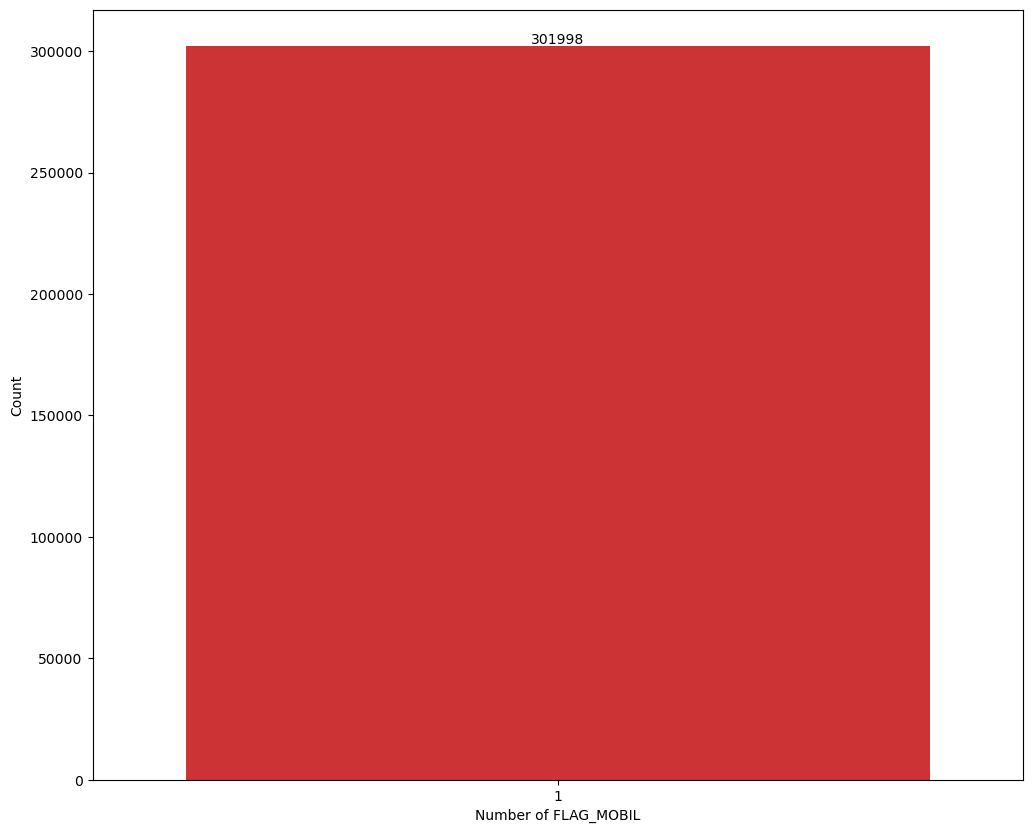

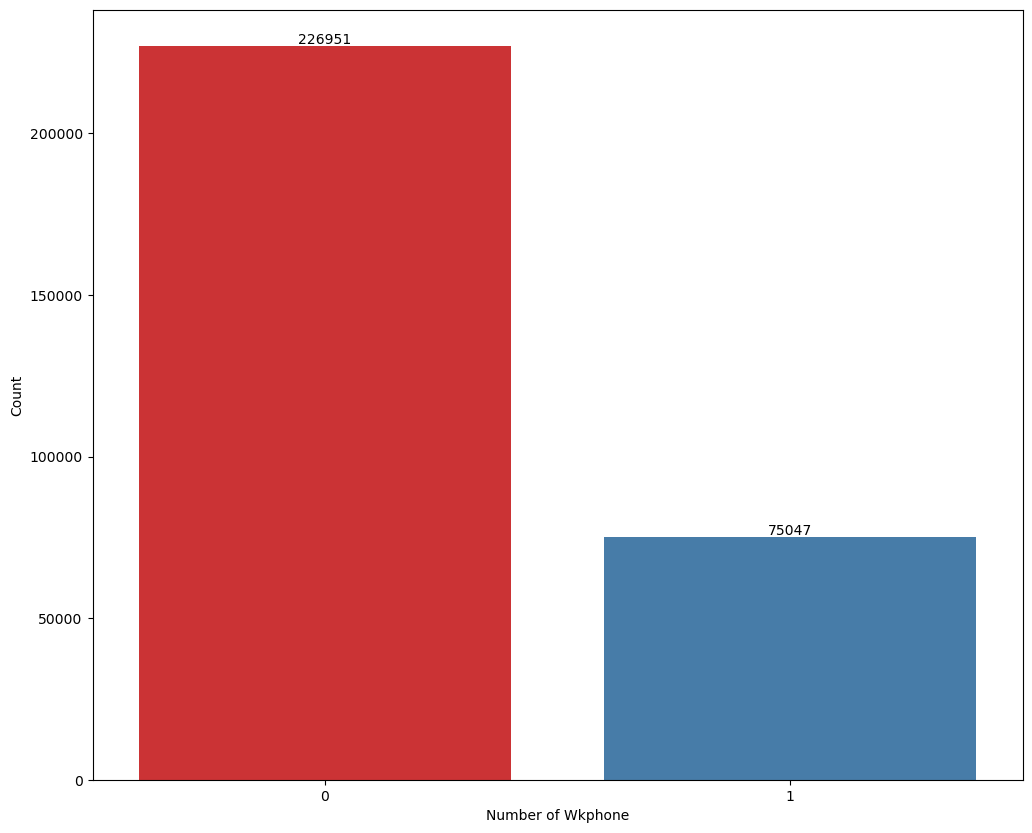

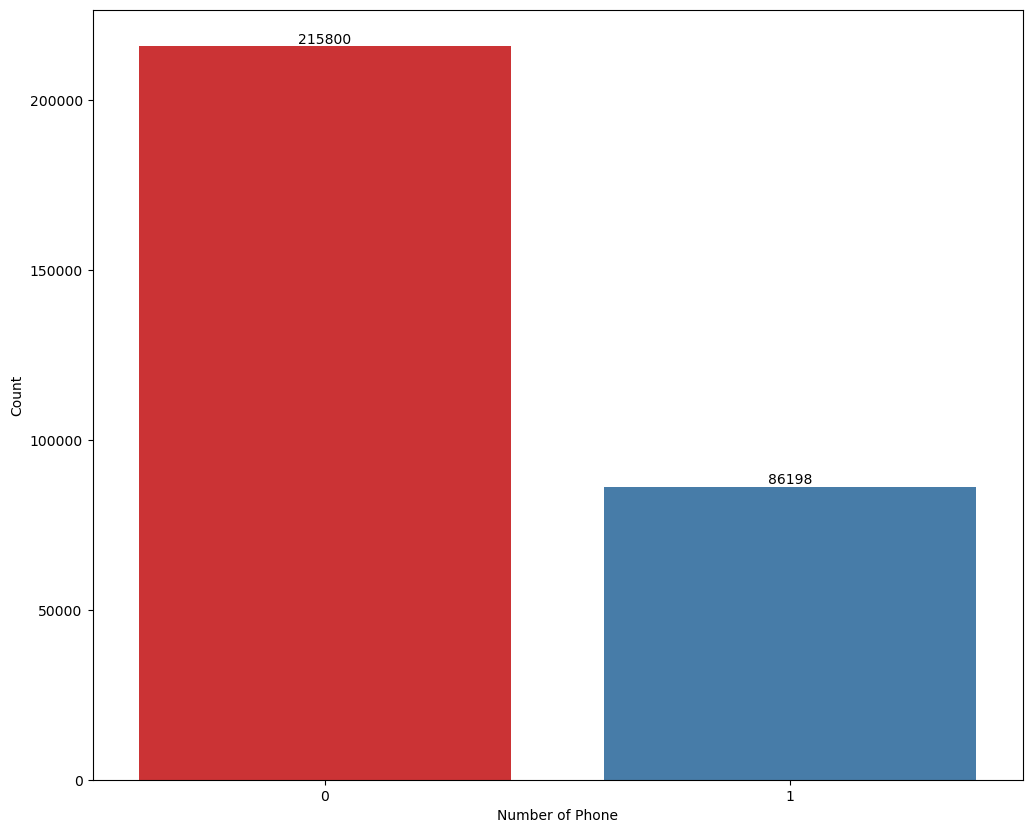

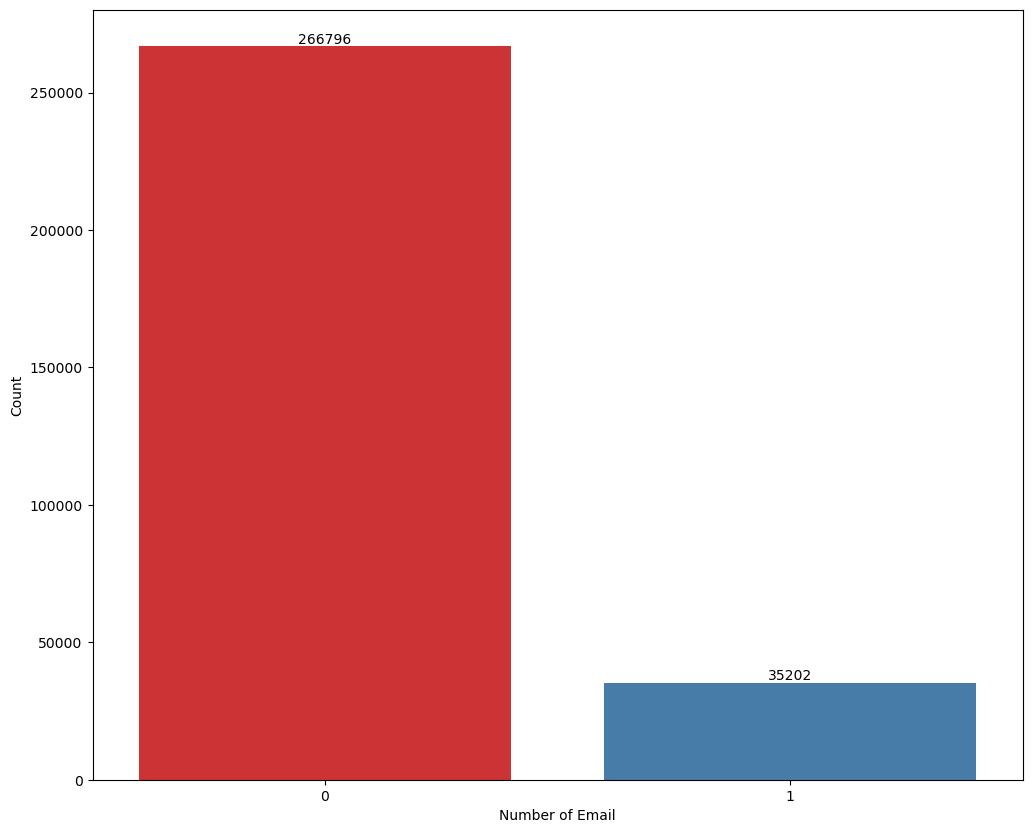

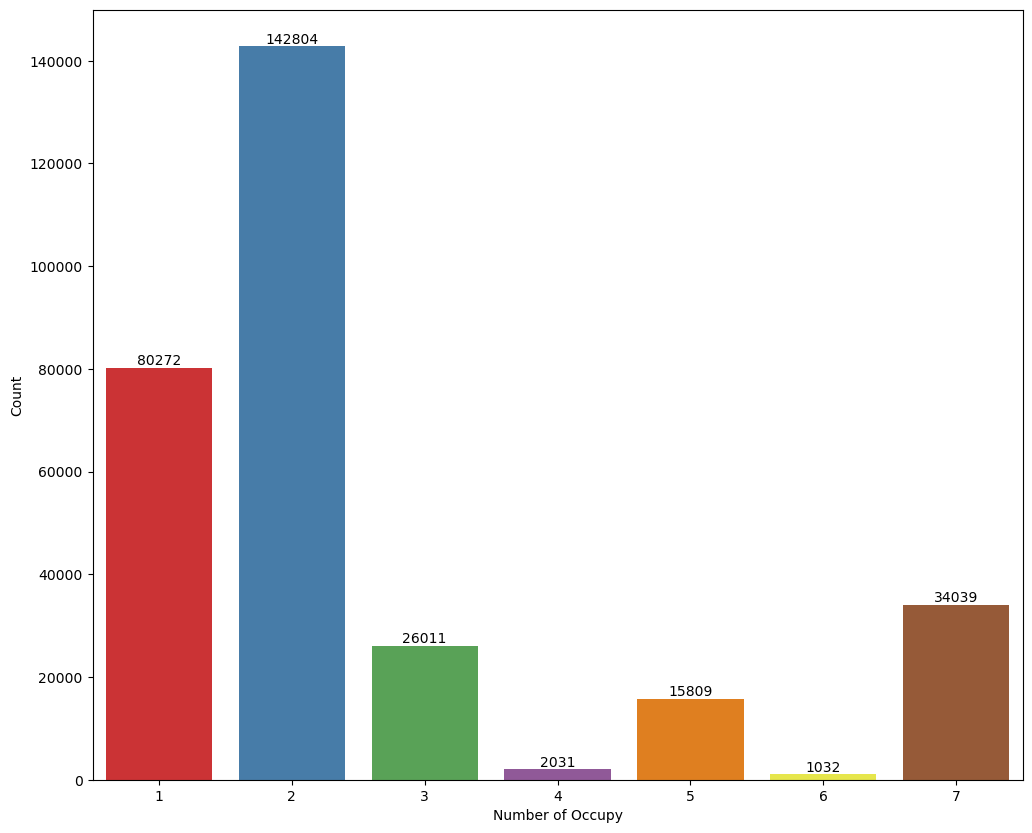

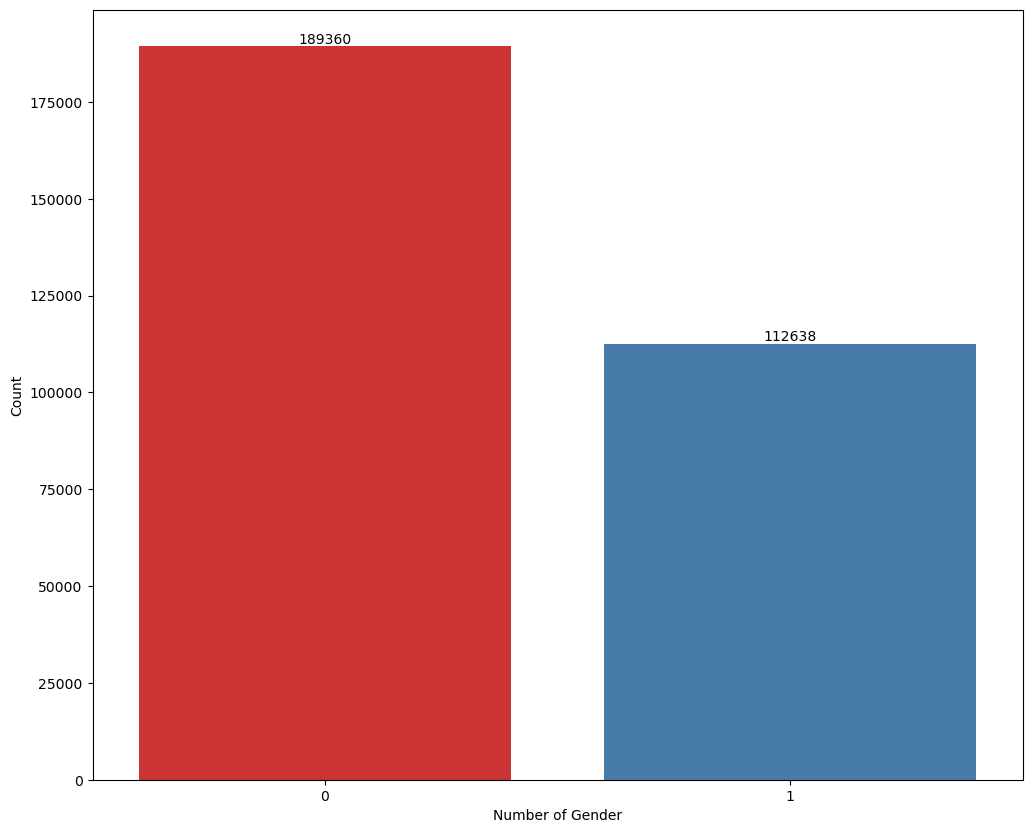

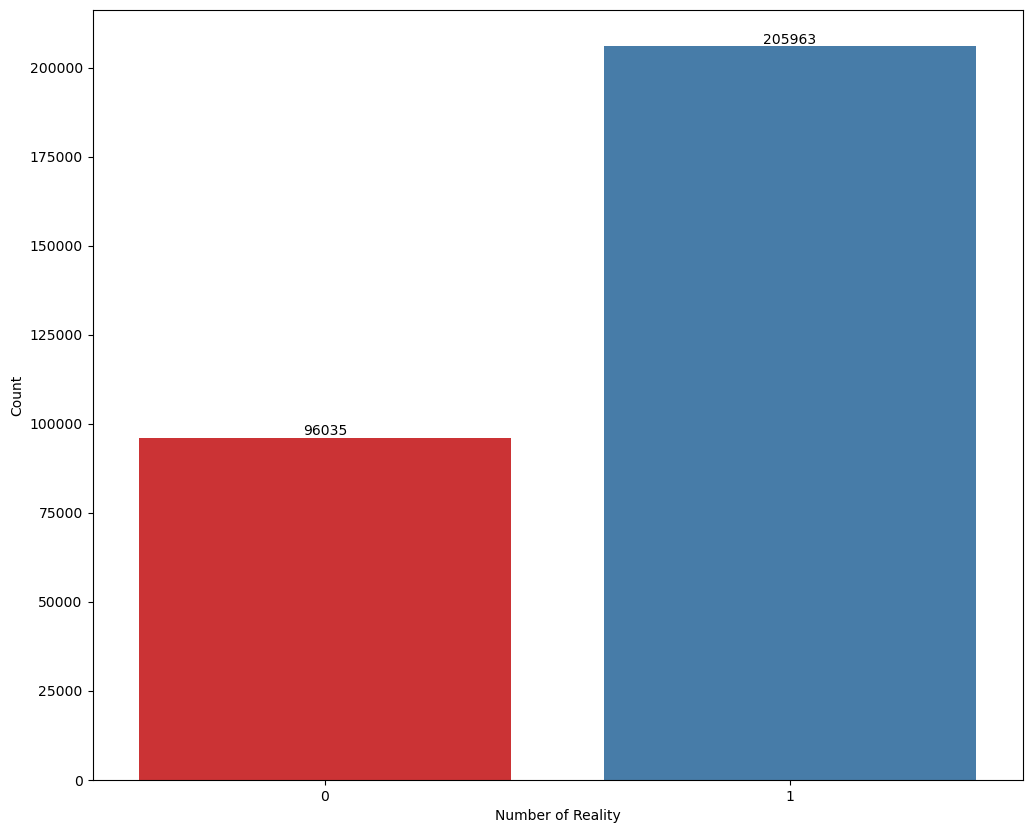

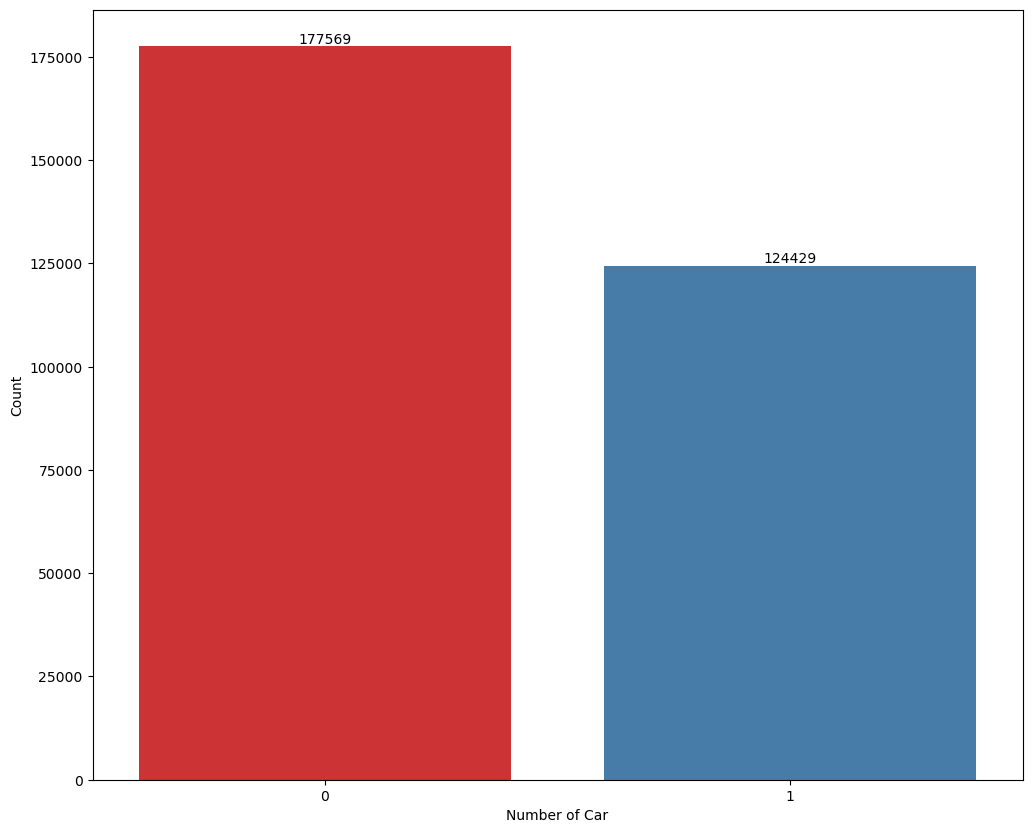

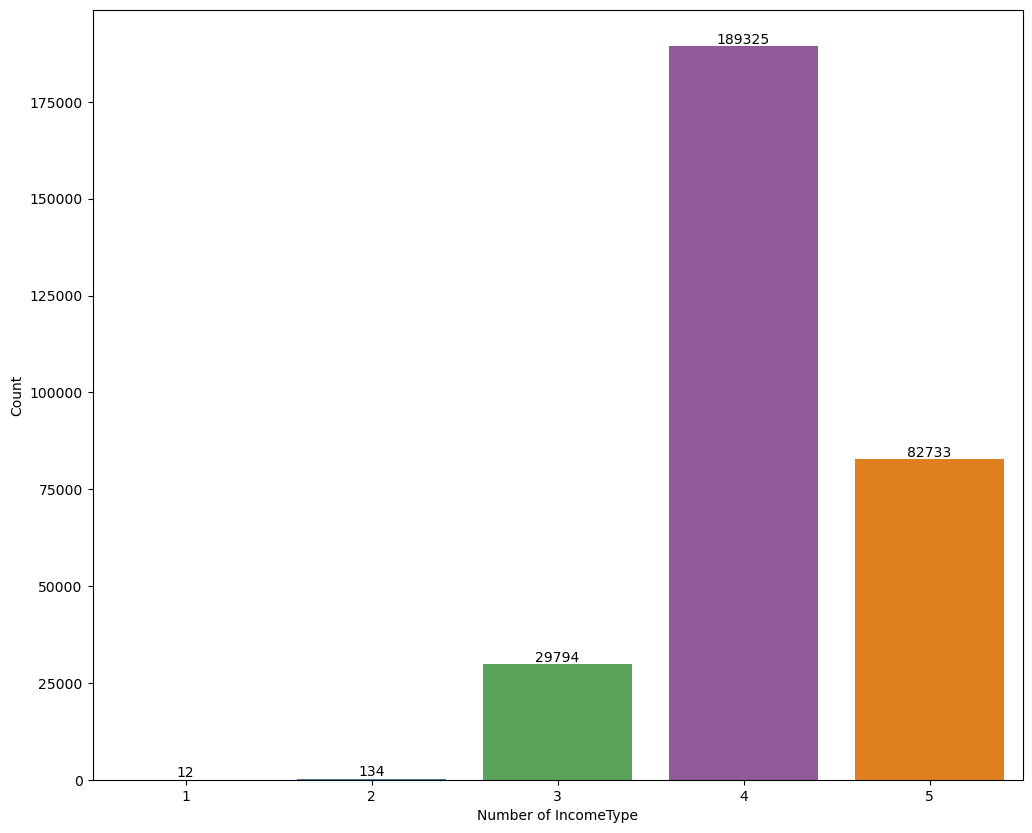

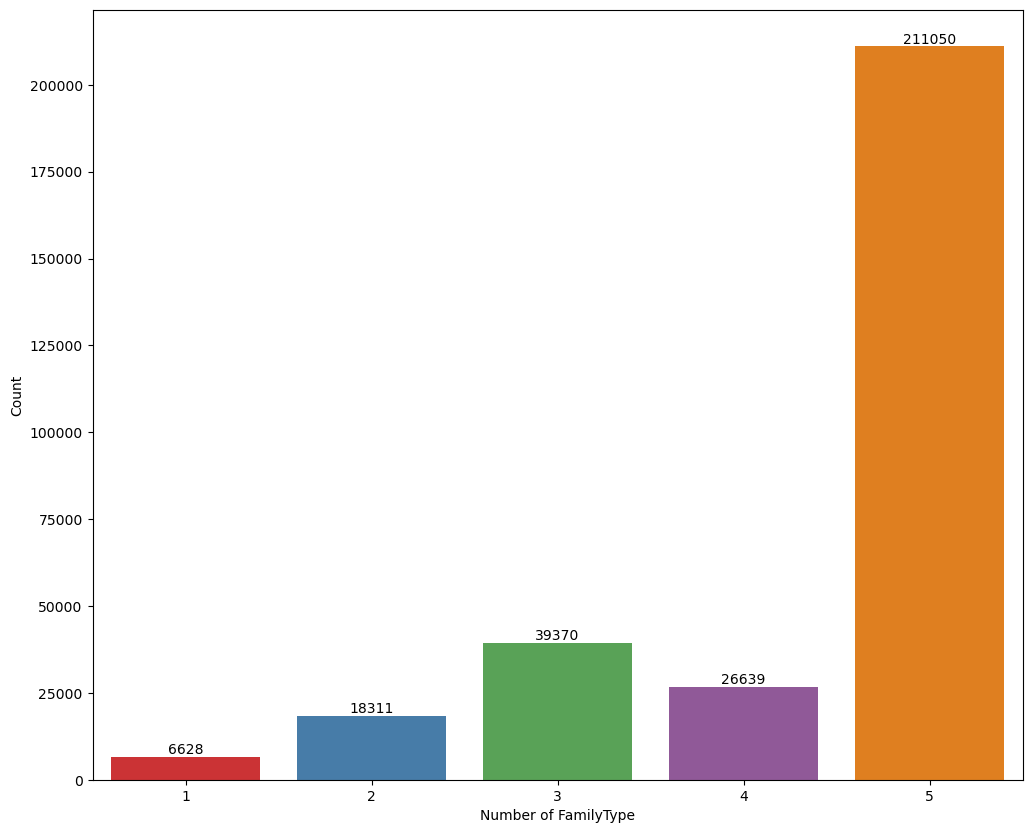

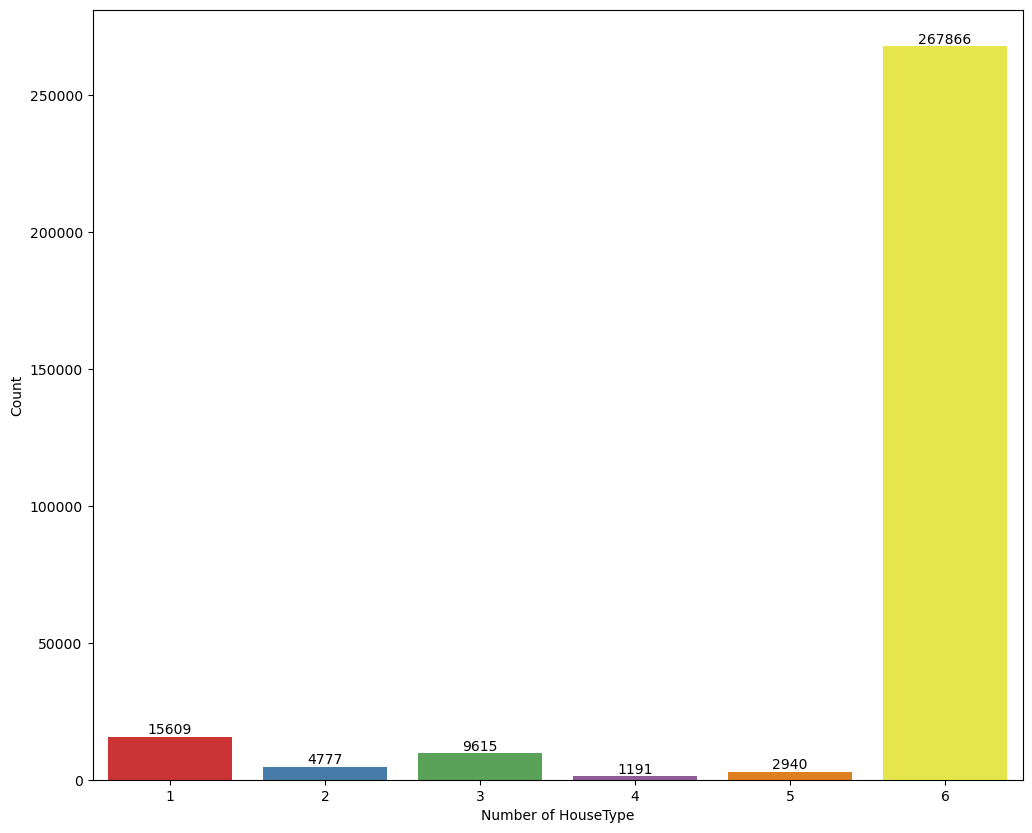

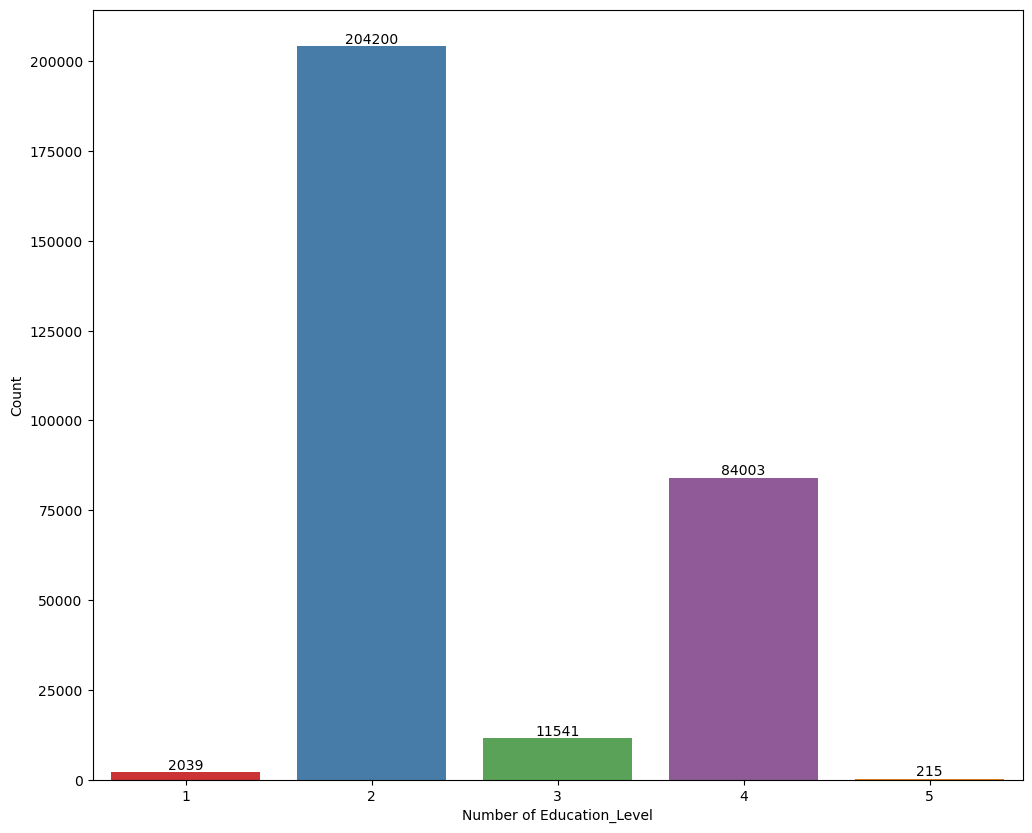

In [141]:
for column in cat_cols:
    plt.figure(figsize=(12, 10))

    ax = sns.countplot(x=f'{column}', data=application, palette='Set1')
    ax.bar_label(ax.containers[0])
    for p in ax.patches:
        height = p.get_height()
        
    ax.set_ylabel("Count")
    ax.set_xlabel(f"Number of {column}")

    plt.show()

In [142]:
application.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,301998.0,6.023139e+06,569864.072098,5.008806e+06,5.617655e+06,6.047956e+06,6.450996e+06,7.999952e+06
Gender,301998.0,3.729760e-01,0.483597,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Car,301998.0,4.120193e-01,0.492199,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Reality,301998.0,6.820012e-01,0.465700,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
ChildNo,301998.0,5.110497e-01,0.765416,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
Income,301998.0,1.894469e+05,87299.126921,2.700000e+04,1.350000e+05,1.800000e+05,2.250000e+05,5.850000e+05
IncomeType,301998.0,4.174289e+00,0.586826,1.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
FamilyType,301998.0,4.381373e+00,1.060106,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
HouseType,301998.0,5.565163e+00,1.291590,1.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
DAYS_BIRTH,301998.0,4.054426e+01,9.555149,2.051781e+01,3.269589e+01,3.992055e+01,4.776164e+01,6.786301e+01


## Credit

In [143]:
credit = pd.read_csv('../data/credit_record.csv')
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


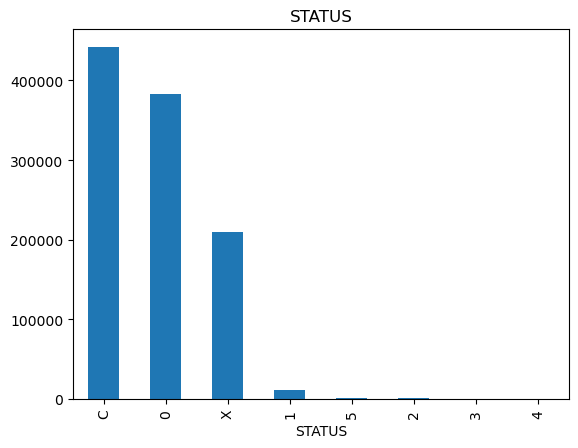

In [144]:
credit['STATUS'].value_counts().plot(kind='bar')
plt.title('STATUS')
plt.show()

In [145]:
grouped = credit.groupby('ID')

In [146]:
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [147]:
credit['MONTHS_BALANCE'] = pd.to_numeric(credit['MONTHS_BALANCE'], errors='coerce')

pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()

In [148]:
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()  
pivot_tb['ID'] = pivot_tb.index

In [149]:
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb.head()

MONTHS_BALANCE,ID,open_month,end_month
ID,,,
5001711,5001711,-3,0
5001712,5001712,-18,0
5001713,5001713,-21,0
5001714,5001714,-14,0
5001715,5001715,-59,0


In [150]:
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']

In [151]:
pivot_tb.reset_index(drop = True, inplace = True)

In [152]:
credit = pd.merge(credit, pivot_tb, on = 'ID', how = 'left')

In [153]:
credit.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18


In [154]:
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) 
credit['status'] = credit['status'].astype(np.int8) 
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] 
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit0 = credit.copy()
credit0.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
3,5001711,-3,0,-3,0,3,0,0
2,5001711,-2,0,-3,0,3,0,1
1,5001711,-1,0,-3,0,3,0,2
0,5001711,0,X,-3,0,3,0,3
22,5001712,-18,0,-18,0,18,0,0


In [156]:
credit['application_status'] = credit.groupby('ID')['status'].transform('max')
truncate = credit.loc[credit['application_status']==1,]
not_trunc = credit.loc[credit['application_status']==0,]
credit

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book,application_status
3,5001711,-3,0,-3,0,3,0,0,0
2,5001711,-2,0,-3,0,3,0,1,0
1,5001711,-1,0,-3,0,3,0,2,0
0,5001711,0,X,-3,0,3,0,3,0
22,5001712,-18,0,-18,0,18,0,0,0
...,...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25,0
1048548,5150487,-3,C,-29,0,29,0,26,0
1048547,5150487,-2,C,-29,0,29,0,27,0
1048546,5150487,-1,C,-29,0,29,0,28,0


In [157]:
import pandas as pd

dt1 = not_trunc.groupby('ID').agg({
    'month_on_book': ['max'],
    'application_status': ['max']
})
dt1.reset_index(inplace=True)
dt1.columns = ['ID', 'month_on_book', 'application_status']

dt2 = truncate.loc[truncate['status'] == 1].groupby('ID').agg({
    'month_on_book': ['min'],
    'application_status': ['max']
})
dt2.reset_index(inplace=True)
dt2.columns = ['ID', 'month_on_book', 'application_status']

dt = pd.concat([dt1, dt2], ignore_index=True)

dt

            ID  month_on_book  application_status
0      5001711              3                   0
1      5001712             18                   0
2      5001713             21                   0
3      5001714             14                   0
4      5001715             59                   0
...        ...            ...                 ...
45980  5149834              8                   1
45981  5149838              8                   1
45982  5150049              9                   1
45983  5150238             48                   1
45984  5150337              3                   1

[45985 rows x 3 columns]


In [158]:
dt = pd.merge(dt, application, on = 'ID', how = 'left')
dt.fillna('unknown',inplace=True)
pd.options.display.max_rows = 999
dt

            ID  month_on_book  application_status   Gender      Car  Reality  \
0      5001711              3                   0  unknown  unknown  unknown   
1      5001712             18                   0  unknown  unknown  unknown   
2      5001713             21                   0  unknown  unknown  unknown   
3      5001714             14                   0  unknown  unknown  unknown   
4      5001715             59                   0  unknown  unknown  unknown   
...        ...            ...                 ...      ...      ...      ...   
45980  5149834              8                   1      0.0      0.0      1.0   
45981  5149838              8                   1      0.0      0.0      1.0   
45982  5150049              9                   1      0.0      0.0      1.0   
45983  5150238             48                   1      0.0      1.0      1.0   
45984  5150337              3                   1      1.0      0.0      1.0   

       ChildNo    Income IncomeType Fam

In [159]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,45985.0,5.070164e+06,45433.635871,5001711.0,5026147.0,5065737.0,5114024.0,5150487.0
month_on_book,45985.0,2.146780e+01,15.400588,0.0,9.0,18.0,32.0,60.0
application_status,45985.0,1.450473e-02,0.119560,0.0,0.0,0.0,0.0,1.0


In [160]:
dt.dtypes

ID                     int64
month_on_book          int64
application_status      int8
Gender                object
Car                   object
Reality               object
ChildNo               object
Income                object
IncomeType            object
FamilyType            object
HouseType             object
DAYS_BIRTH            object
DAYS_EMPLOYED         object
FLAG_MOBIL            object
Wkphone               object
Phone                 object
Email                 object
Occupy                object
FamilySize            object
Education_Level       object
dtype: object

In [161]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  45985 non-null  int64 
 1   month_on_book       45985 non-null  int64 
 2   application_status  45985 non-null  int8  
 3   Gender              45985 non-null  object
 4   Car                 45985 non-null  object
 5   Reality             45985 non-null  object
 6   ChildNo             45985 non-null  object
 7   Income              45985 non-null  object
 8   IncomeType          45985 non-null  object
 9   FamilyType          45985 non-null  object
 10  HouseType           45985 non-null  object
 11  DAYS_BIRTH          45985 non-null  object
 12  DAYS_EMPLOYED       45985 non-null  object
 13  FLAG_MOBIL          45985 non-null  object
 14  Wkphone             45985 non-null  object
 15  Phone               45985 non-null  object
 16  Email               45

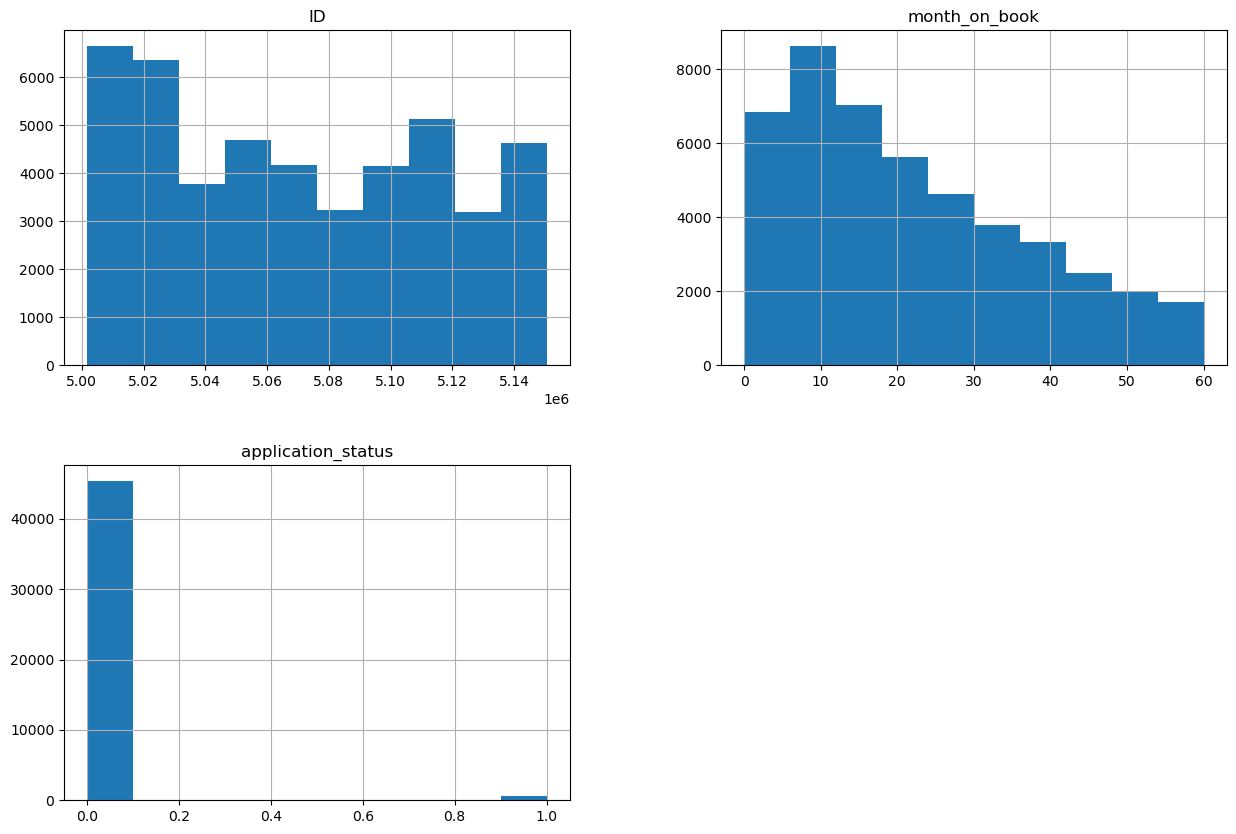

In [163]:
dt.hist(figsize=(15,10));